In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extracting zips


In [ ]:
import zipfile
import os


# Define paths
zip_file_path = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/dioscorea_nyh.zip'
extracted_folder_path = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/dioscorea_nyh'
output_directories = ['/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/directory1/', '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/directory2/',
                      '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/directory3/', '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/directory4/',
                      '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/directory5/']

# Create directories if they don't exist
#for directory in output_directories:
    #os.makedirs(directory, exist_ok=True)

# Extract the zip file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    #zip_ref.extractall(extracted_folder_path)

# List all the extracted images in descending lexicographical order
images = sorted(os.listdir(extracted_folder_path), reverse=True)

# Define image count limits for each directory
limits = [750, 750, 750, 400, len(images)]

# Copy images to respective directories
start_idx = 0
for i, limit in enumerate(limits):
    end_idx = start_idx + limit
    for image in images[start_idx:end_idx]:
        source_path = os.path.join(extracted_folder_path, image)
        destination_path = os.path.join(output_directories[i], image)
        os.rename(source_path, destination_path)
    start_idx = end_idx

# Clean up: remove extracted folder
os.rmdir(extracted_folder_path)


In [ ]:
import os

# Define paths
directory4_path = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/directory4/'
directory5_path = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/directory5/'

# List all the images in directory4 and directory5
images_directory4 = sorted(os.listdir(directory4_path), reverse=True)
images_directory5 = sorted(os.listdir(directory5_path), reverse=True)

# Get the number of images to move from directory5 to directory4
num_images_to_move = len(images_directory5) - 400

# Move images from directory5 to directory4
for i in range(num_images_to_move):
    source_path = os.path.join(directory5_path, images_directory5[i])
    destination_path = os.path.join(directory4_path, images_directory5[i])
    os.rename(source_path, destination_path)

print(f'Moved {num_images_to_move} images from directory5 to directory4.')


Moved 28 images from directory5 to directory4.


In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/NYH_dioscorea_Last400ann.zip'
extracted_folder_path = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/NYH_dioscorea_Last400ann'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Cropping from annotations and images

In [ ]:
import os
import cv2
import xml.etree.ElementTree as ET

# Define the paths
xml_dir = "/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/NYH_dioscorea_Last400ann"
image_dir = "/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/Last400"
output_dir = "/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/Last400crops"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate through the XML files in the directory
for xml_file in os.listdir(xml_dir):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(xml_dir, xml_file)

        # Parse the XML file
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        # Get the corresponding image name
        image_name = os.path.splitext(xml_file)[0] + ".jpg"
        image_path = os.path.join(image_dir, image_name)

        # Load the image
        img = cv2.imread(image_path)

        # Iterate through the objects
        for i, obj_elem in enumerate(root.findall(".//object")):
            name = obj_elem.find("name").text
            if name == "Good Quality Leaf":
                xtl = float(obj_elem.find(".//bndbox/xmin").text)
                ytl = float(obj_elem.find(".//bndbox/ymin").text)
                xbr = float(obj_elem.find(".//bndbox/xmax").text)
                ybr = float(obj_elem.find(".//bndbox/ymax").text)

                # Crop the box
                cropped_box = img[int(ytl):int(ybr), int(xtl):int(xbr)]

                # Save the cropped image
                output_filename = f"{os.path.splitext(image_name)[0]}_leaf_{i}.jpg"
                output_path = os.path.join(output_dir, output_filename)
                cv2.imwrite(output_path, cropped_box)

print("Cropping and saving completed.")

Cropping and saving completed.


In [ ]:
import zipfile
import os

# Define the path of the folder containing the images
image_folder_path = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/Last400crops'

# Define the name of the zip file
zip_filename = '/content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/Last400crops.zip'

# Create a new zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add all files from the image folder to the zip file
    for root, dirs, files in os.walk(image_folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, image_folder_path)
            zipf.write(file_path, arcname=arcname)

print(f'Images compressed and saved to {zip_filename}.')


Images compressed and saved to /content/drive/MyDrive/Github/projs/Dioscoreaceae Leafs/NYH_dioscorea/Last400crops.zip.


In [ ]:
import zipfile
import os
import shutil

# Define the source and destination folders
source_zip = '/content/drive/MyDrive/dioscor_crops.zip'  # Specify the correct path
destination_folder = '/content/drive/MyDrive/few-shot-leaf-segmentation/data/images'  # Specify the correct path

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(source_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Extract to /content/ directory

# Define the path to the extracted folder
extracted_folder = '/content/dioscor_crops/'

# Iterate through the files in the extracted folder
for file in os.listdir(extracted_folder):
    if file.endswith('.jpg'):
        # Define source and destination paths
        source_path = os.path.join(extracted_folder, file)
        destination_path = os.path.join(destination_folder, f'{os.path.splitext(file)[0]}_bot.jpg')

        # Copy and rename the file
        shutil.copy(source_path, destination_path)

# Clean up: remove the extracted folder
shutil.rmtree(extracted_folder)

In [ ]:
import os

# Define the directory path
directory_path = '/content/drive/MyDrive/few-shot-leaf-segmentation/data/leaf_preds'

# Get a list of file names (excluding extensions)
image_names = [os.path.splitext(file)[0] for file in os.listdir(directory_path) if file.endswith('.png')]

# Define the output file path
output_file = '/content/drive/MyDrive/few-shot-leaf-segmentation/data/leaf_preds/default.txt'

# Write the names to the file
with open(output_file, 'w') as file:
    file.write('\n'.join(image_names))

print(f"Names written to {output_file}.")

Names written to /content/drive/MyDrive/few-shot-leaf-segmentation/data/leaf_preds/default.txt.


In [ ]:
import os

# Define the paths
images_dir = '/content/drive/MyDrive/few-shot-leaf-segmentation/data/images'
leaf_preds_dir = '/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds'

# Get a list of all files in the images directory
image_files = os.listdir(images_dir)

# Iterate through the image files
for image_file in image_files:
    # Get the file name (excluding extension)
    file_name, file_extension = os.path.splitext(image_file)

    # Check if there is a file with the same name in leaf_preds directory
    leaf_pred_file = os.path.join(leaf_preds_dir, file_name + '.png')

    if not os.path.exists(leaf_pred_file):
        # File with the same name doesn't exist, delete the file in images directory
        #file_path = os.path.join(images_dir, image_file)
        #os.remove(file_path)
        print(f"Deleted {image_file}.")

Deleted 00643824_leaf_0_bot.jpg.


In [ ]:
from PIL import Image

# Open the image
image = Image.open('/content/COL000287596_leaf_0.png')  # Replace with the actual file path

# Convert the image to RGB mode (if it's not already in that mode)
image = image.convert('RGB')

# Get the RGB values from the image
rgb_values = list(image.getdata())

# Get unique RGB values
unique_rgb_values = list(set(rgb_values))

# Print the unique RGB values
print(unique_rgb_values)

[(128, 0, 0), (0, 0, 0)]


In [ ]:
from PIL import Image
import os

# Define the input and output directory paths
input_directory = '/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds'
output_directory = '/content/drive/MyDrive/vein_fl_preds_modified'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get a list of all PNG files in the input directory
png_files = [f for f in os.listdir(input_directory) if f.endswith('.png')]

# Process each PNG file
for file_name in png_files:
    input_file_path = os.path.join(input_directory, file_name)
    output_file_path = os.path.join(output_directory, file_name)

    # Open the image
    img = Image.open(input_file_path)

    # Convert the image to RGB mode (if it's not already in that mode)
    img = img.convert('RGB')

    # Get the pixel data
    pixels = img.load()

    # Iterate through each pixel and set non-black pixels to (0, 128, 128)
    for i in range(img.width):
        for j in range(img.height):
            if pixels[i, j] != (0, 0, 0):
                pixels[i, j] = (128, 0, 0)

    # Save the modified image to the output directory
    img.save(output_file_path)

print("Processing complete.")

Processing complete.


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
binary_mask = cv2.imread('/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds/00179829_leaf_0_bot.png', cv2.IMREAD_GRAYSCALE)

def filter_thin_structures(mask, kernel_size = 3):
    n = kernel_size

    # Step 1: Apply morphological erosion

    kernel = np.ones((n,n),np.uint8)  # Define a square structuring element of size nxn
    eroded_mask = cv2.erode(binary_mask, kernel, iterations=1)

    # Step 2: Apply morphological dilation

    dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

    # Show the result
    #cv2_imshow(dilated_mask)


    return dilated_mask



# Save the result
#cv2.imwrite('filtered_mask.png', filtered_mask)

In [ ]:
import cv2
import numpy as np

def filter_small_structures(dilated_mask):

    # Identify connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_mask, connectivity=8)

    areas = stats[1:, cv2.CC_STAT_AREA]
    mean_squares_areas = np.sum(areas**2)/len(areas)

    # Define a threshold size (adjust as needed)
    min_component_size = mean_squares_areas**0.5

    # Filter out smaller components
    filtered_mask = np.zeros_like(binary_mask)
    for label in range(1, num_labels):
        if stats[label, cv2.CC_STAT_AREA] >= min_component_size:
            filtered_mask[labels == label] = 255

    # Show the result
    cv2_imshow(filtered_mask)
    return filtered_mask

# Save the filtered mask
#cv2.imwrite('filtered_mask.png', filtered_mask)

In [5]:
!pip install skan

In [ ]:
import numpy as np
from skimage import morphology
import skan

def measure_branching(filtered_mask):
  if np.any(filtered_mask != 0):
    # Apply skeletonization
    skeleton = morphology.skeletonize(filtered_mask*1/255)
    sk = skan.Skeleton(skeleton)

    # Analyze the skeleton
    num_branch_points = np.sum(sk.degrees > 2)  # Count nodes with more than two neighbors

    # Print the number of branching points
    print(f'Number of branching points: {num_branch_points}')
    return num_branch_points
  else:
    print(f'Number of branching points: ', '0')
    return 0

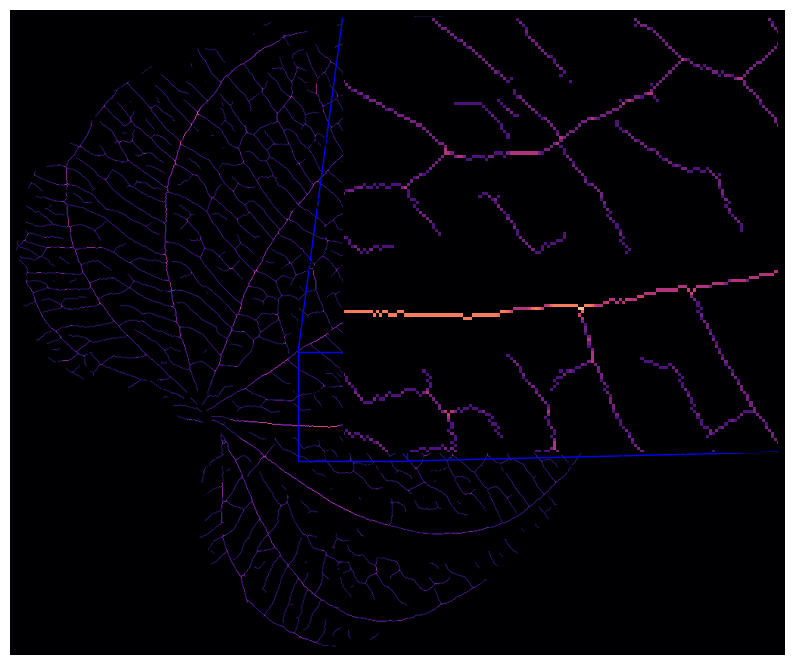

In [65]:
from skimage.morphology import medial_axis
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import medial_axis
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load binary mask
binary_mask = cv2.imread('/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds/00248140_leaf_0_bot.png', cv2.IMREAD_GRAYSCALE)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(binary_mask, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Display the skeleton image
im = ax.imshow(dist_on_skel, cmap='magma')
ax.axis('off')

# Create a zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=4, loc='upper right')
axins.imshow(dist_on_skel, cmap='magma')

# Set the limits of the zoomed-in inset
x1, x2, y1, y2 = 370, 510, 440, 580  # Adjust these values based on your preference
axins.set_xlim(x1, x2)
axins.set_ylim(y2, y1)

# Fix the orientation of the inset
axins.set_axes_locator(axins.get_axes_locator())

# Mark the region of the zoomed-in inset on the main plot
_patch, pp1, pp2 = mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="blue")
pp1.loc1, pp1.loc2 = 2, 3  # inset corner 1 to origin corner 4 (would expect 1)
pp2.loc1, pp2.loc2 = 4, 1  # inset corner 3 to origin corner 2 (would expect 3)

plt.show()


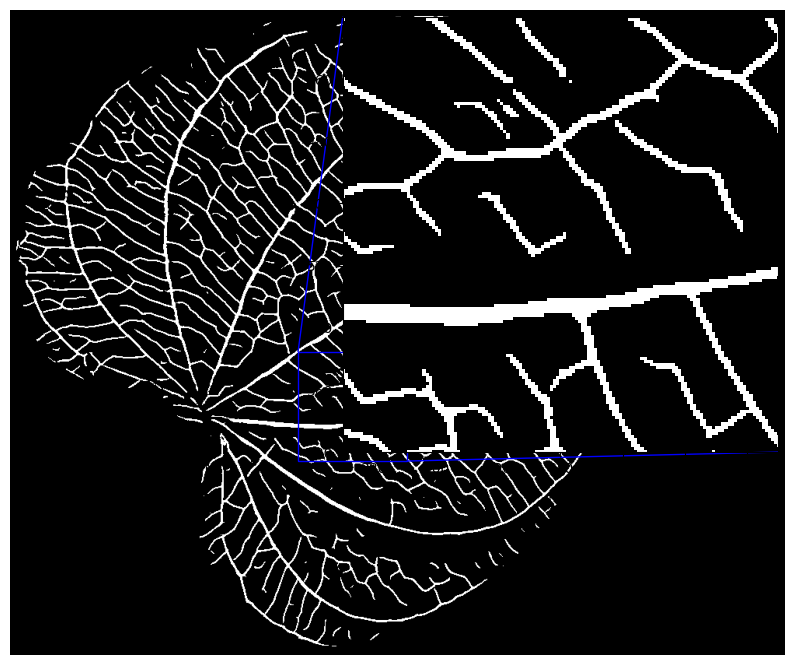

In [67]:
# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Display the skeleton image
im = ax.imshow(binary_mask, cmap=plt.cm.gray)
ax.axis('off')

# Create a zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=4, loc='upper right')
axins.imshow(binary_mask, cmap=plt.cm.gray)

# Set the limits of the zoomed-in inset
x1, x2, y1, y2 = 370, 510, 440, 580  # Adjust these values based on your preference
axins.set_xlim(x1, x2)
axins.set_ylim(y2, y1)

# Fix the orientation of the inset
axins.set_axes_locator(axins.get_axes_locator())

# Mark the region of the zoomed-in inset on the main plot
_patch, pp1, pp2 = mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="blue")
pp1.loc1, pp1.loc2 = 2, 3  # inset corner 1 to origin corner 4 (would expect 1)
pp2.loc1, pp2.loc2 = 4, 1  # inset corner 3 to origin corner 2 (would expect 3)

plt.show()


<Axes: >

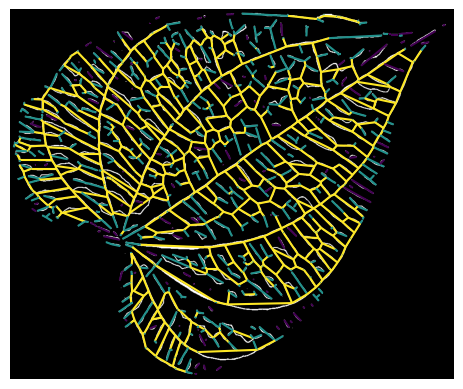

In [68]:
from skan import Skeleton, summarize
from skan import draw
branch_data = summarize(Skeleton(skel))
draw.overlay_euclidean_skeleton_2d(binary_mask, branch_data,
                                   skeleton_color_source='branch-type')

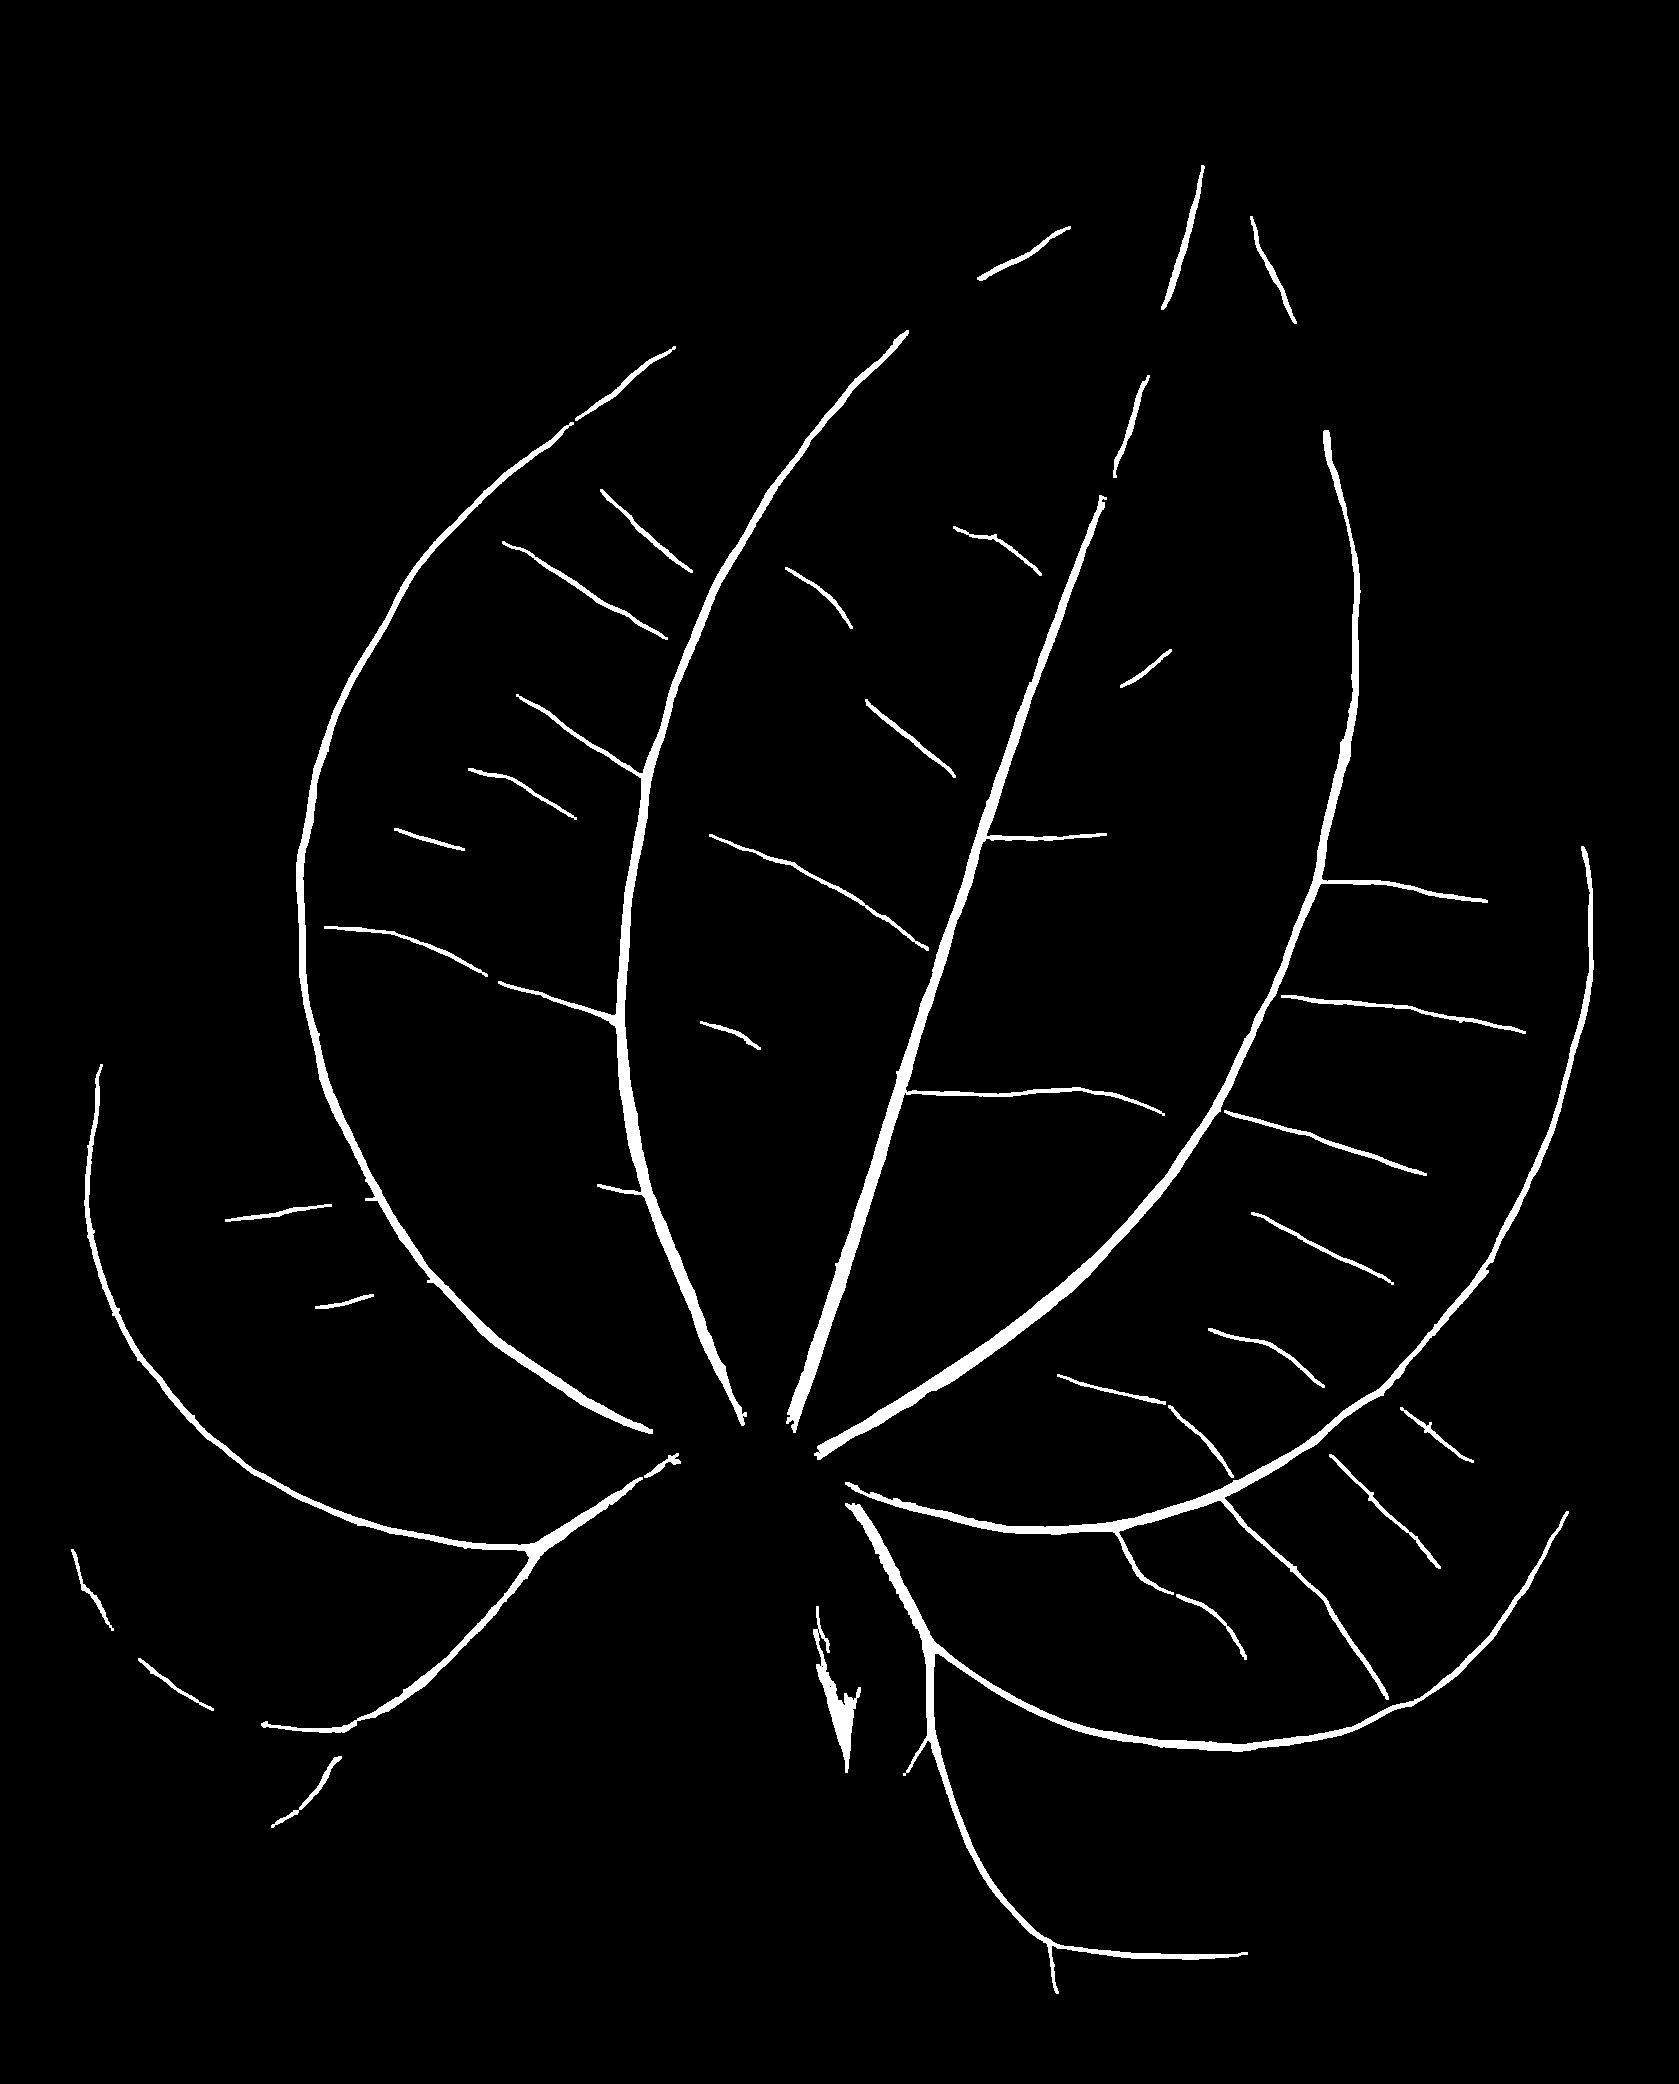

Number of branching points: 50


50

In [ ]:
binary_mask = cv2.imread('/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds/00179829_leaf_0_bot.png', cv2.IMREAD_GRAYSCALE)

m = 3
mask1 = filter_thin_structures(binary_mask, kernel_size = m)
mask2 = filter_small_structures(mask1)
measure_branching(mask2)

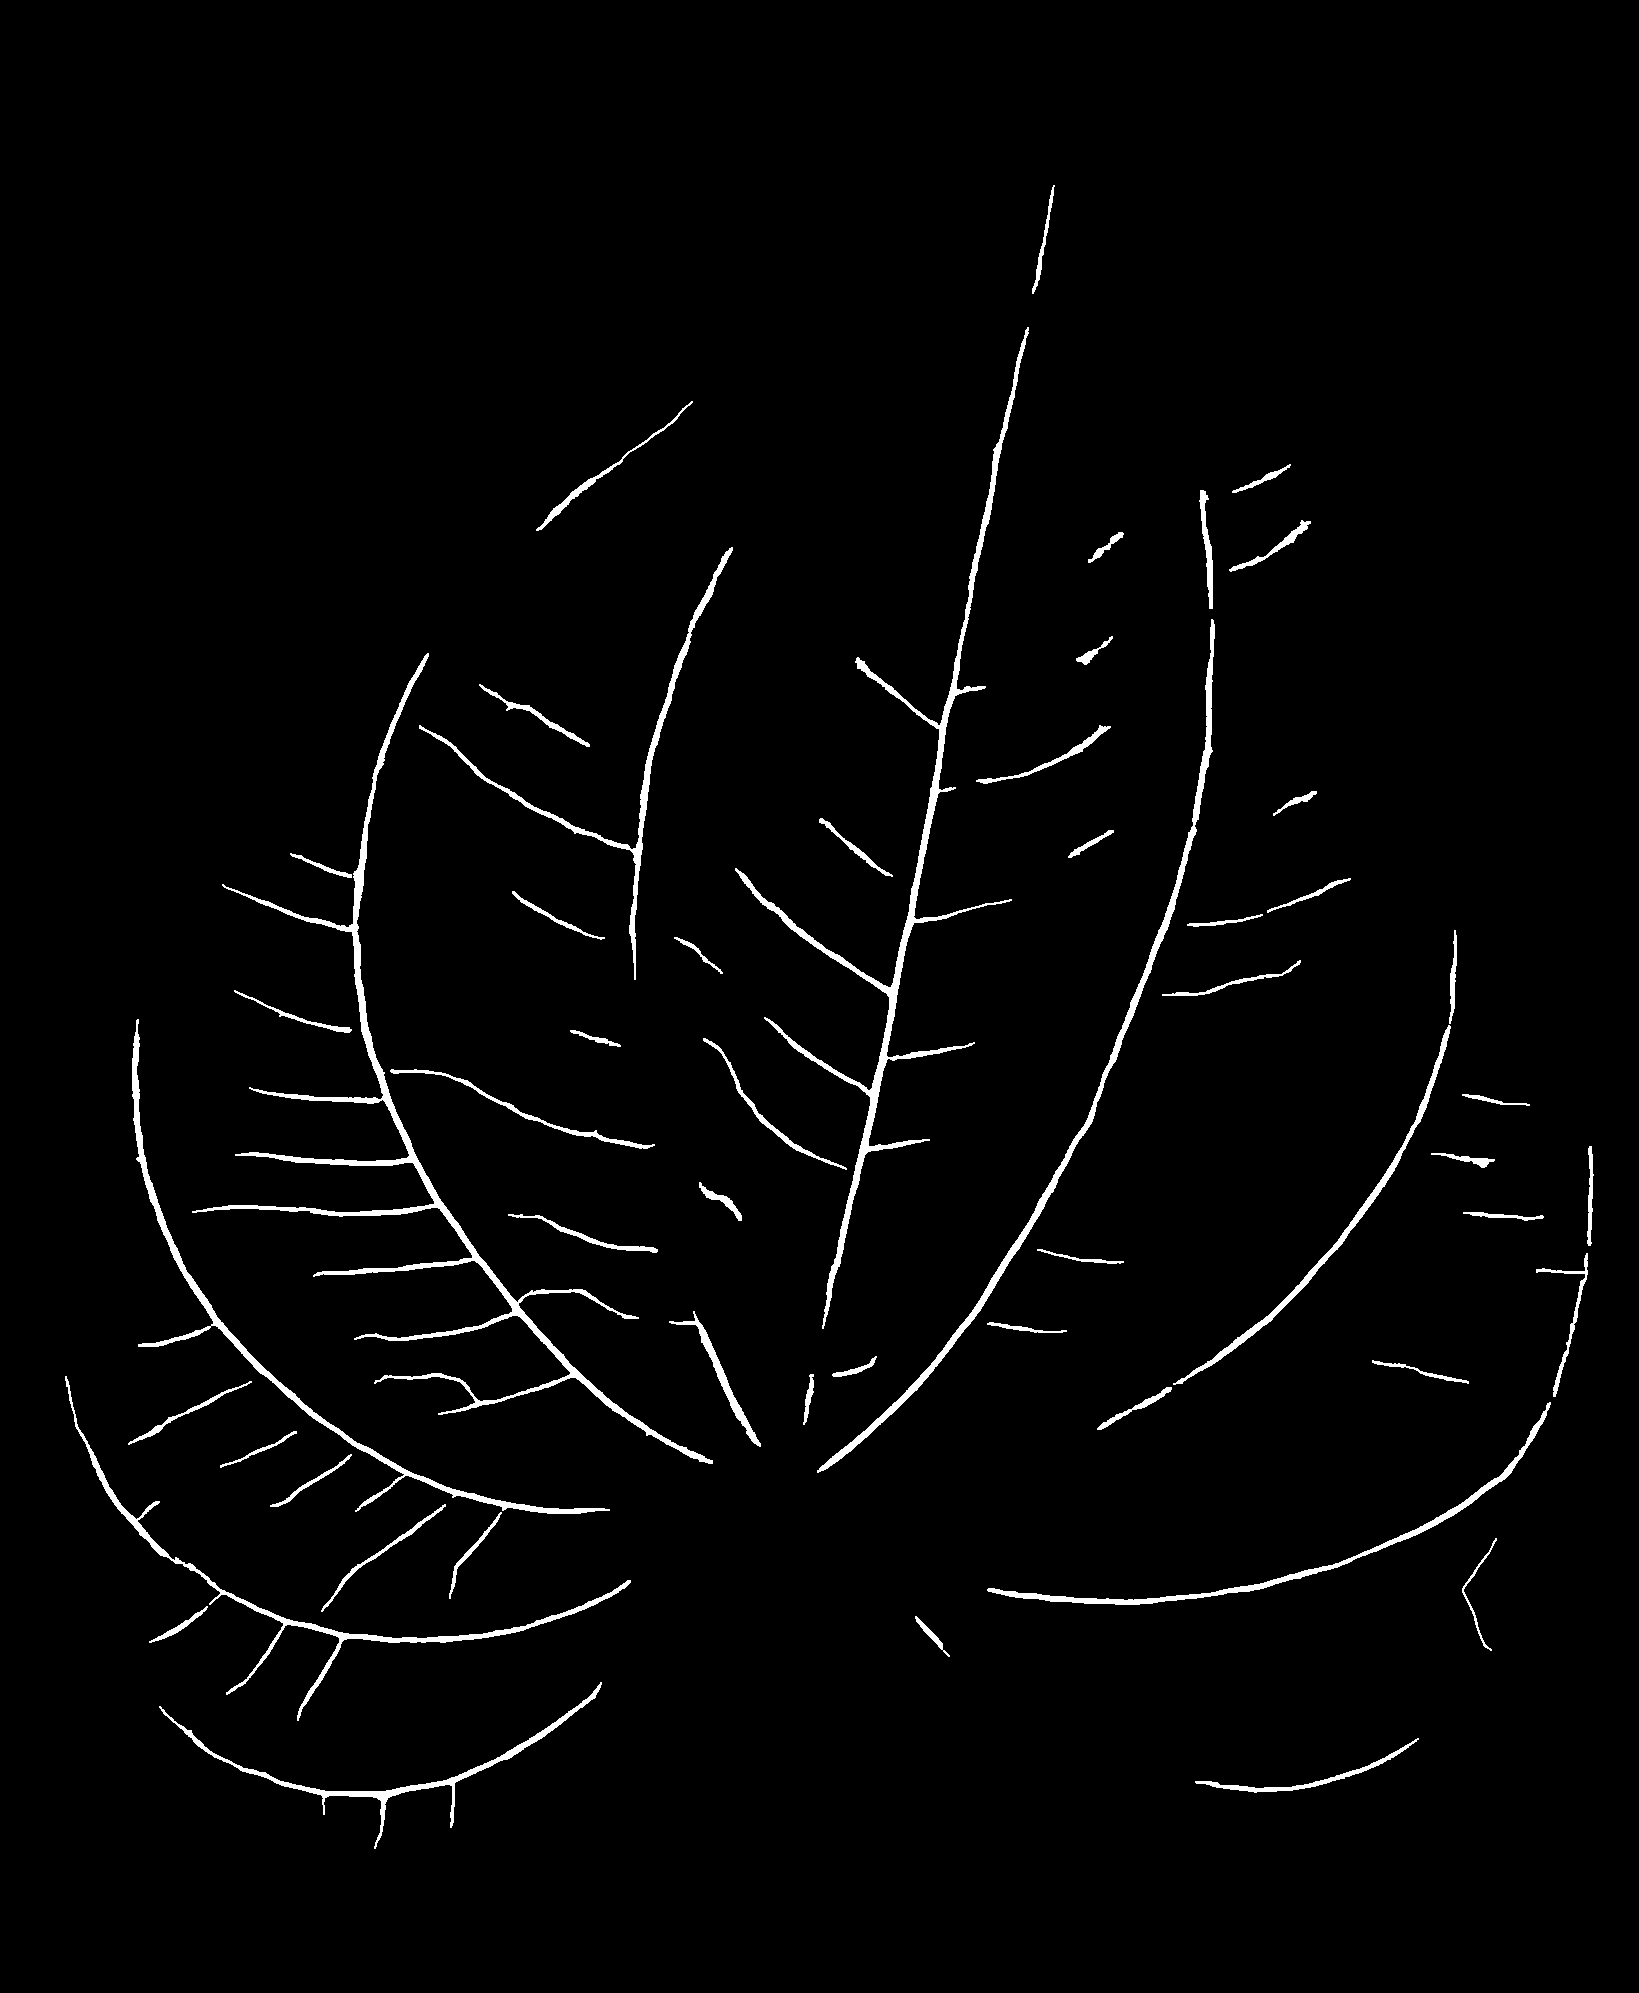

Number of branching points: 42


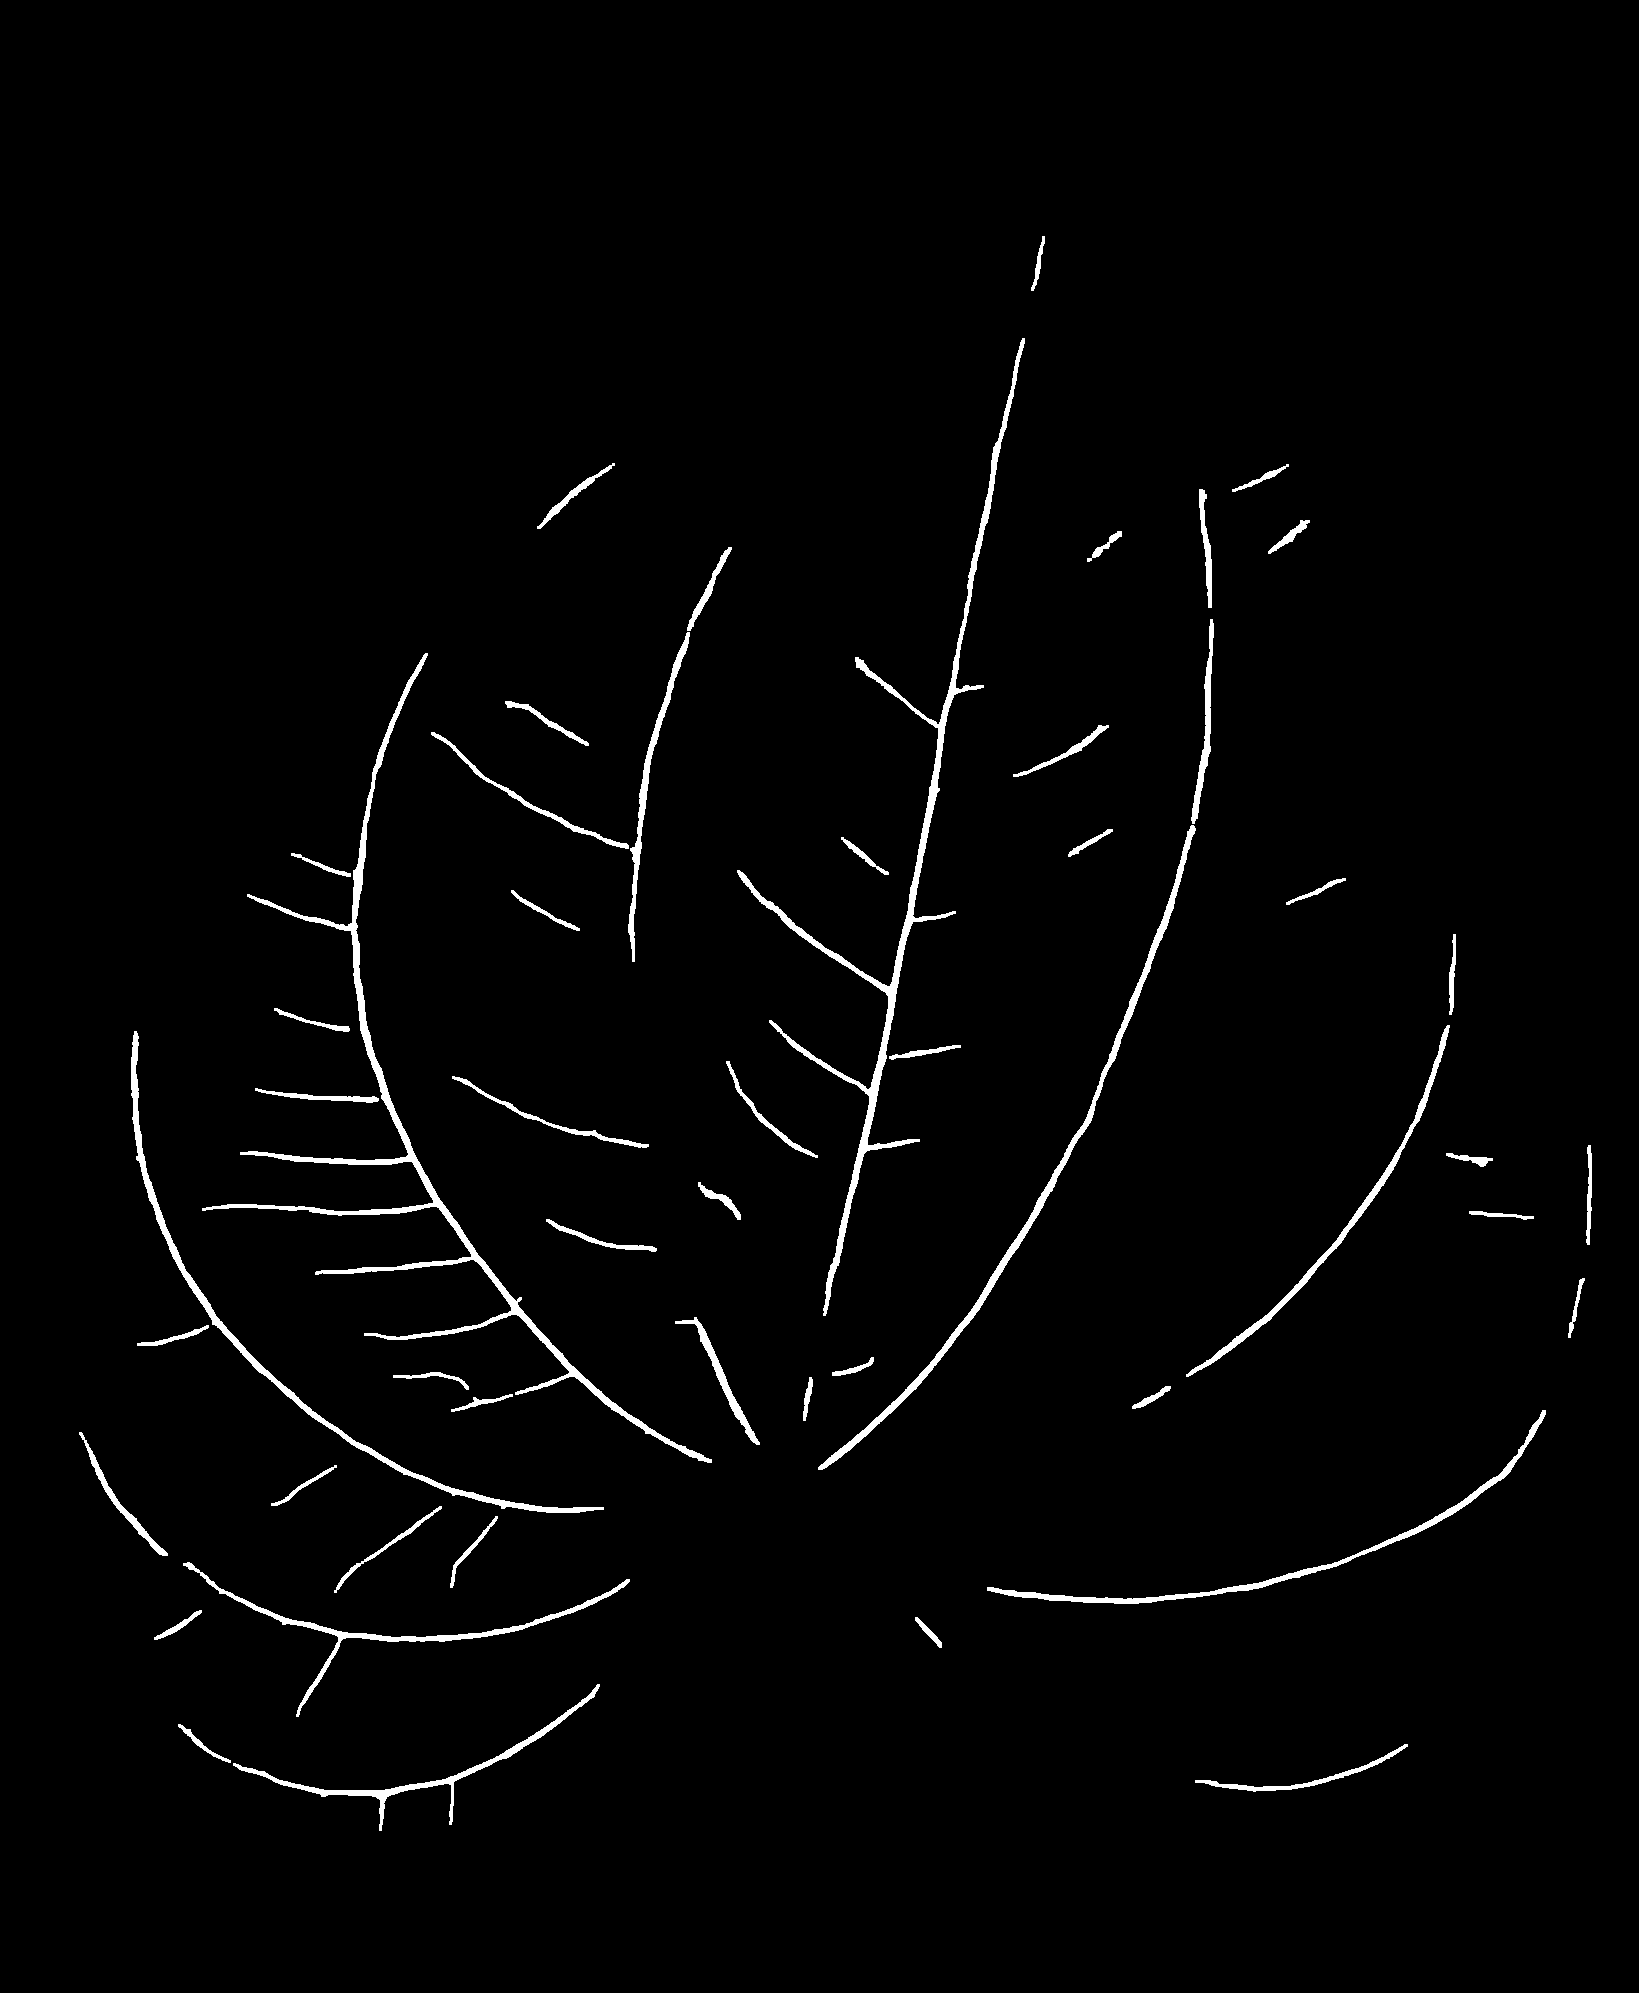

Number of branching points: 28


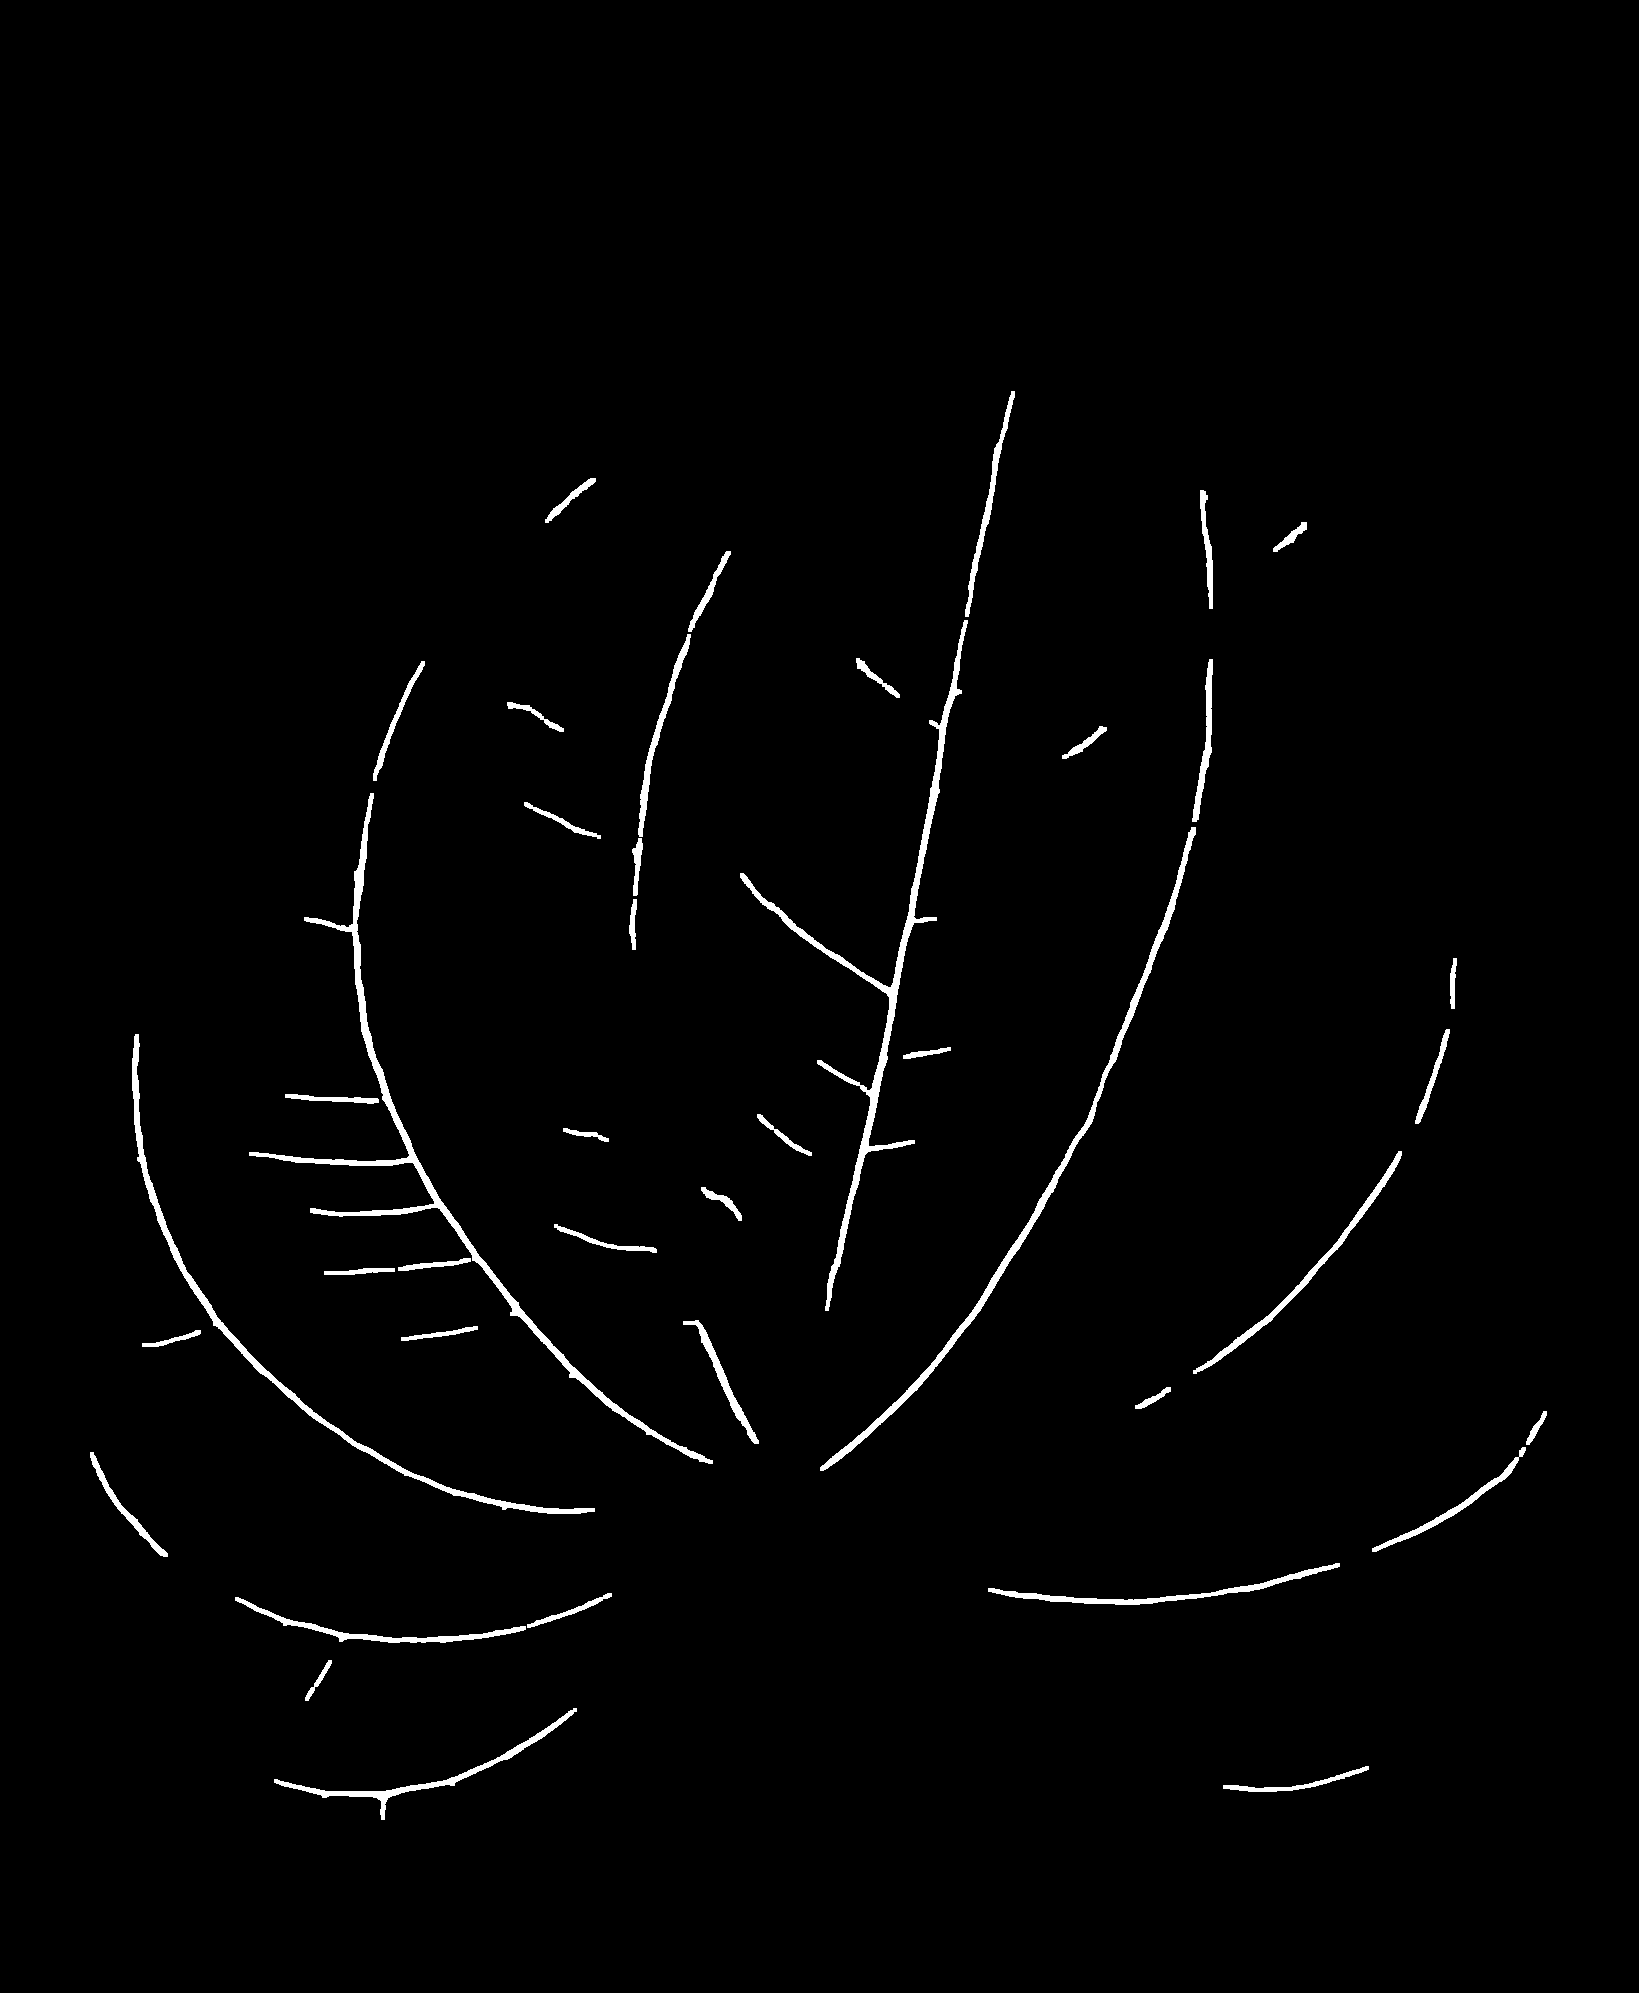

Number of branching points: 22


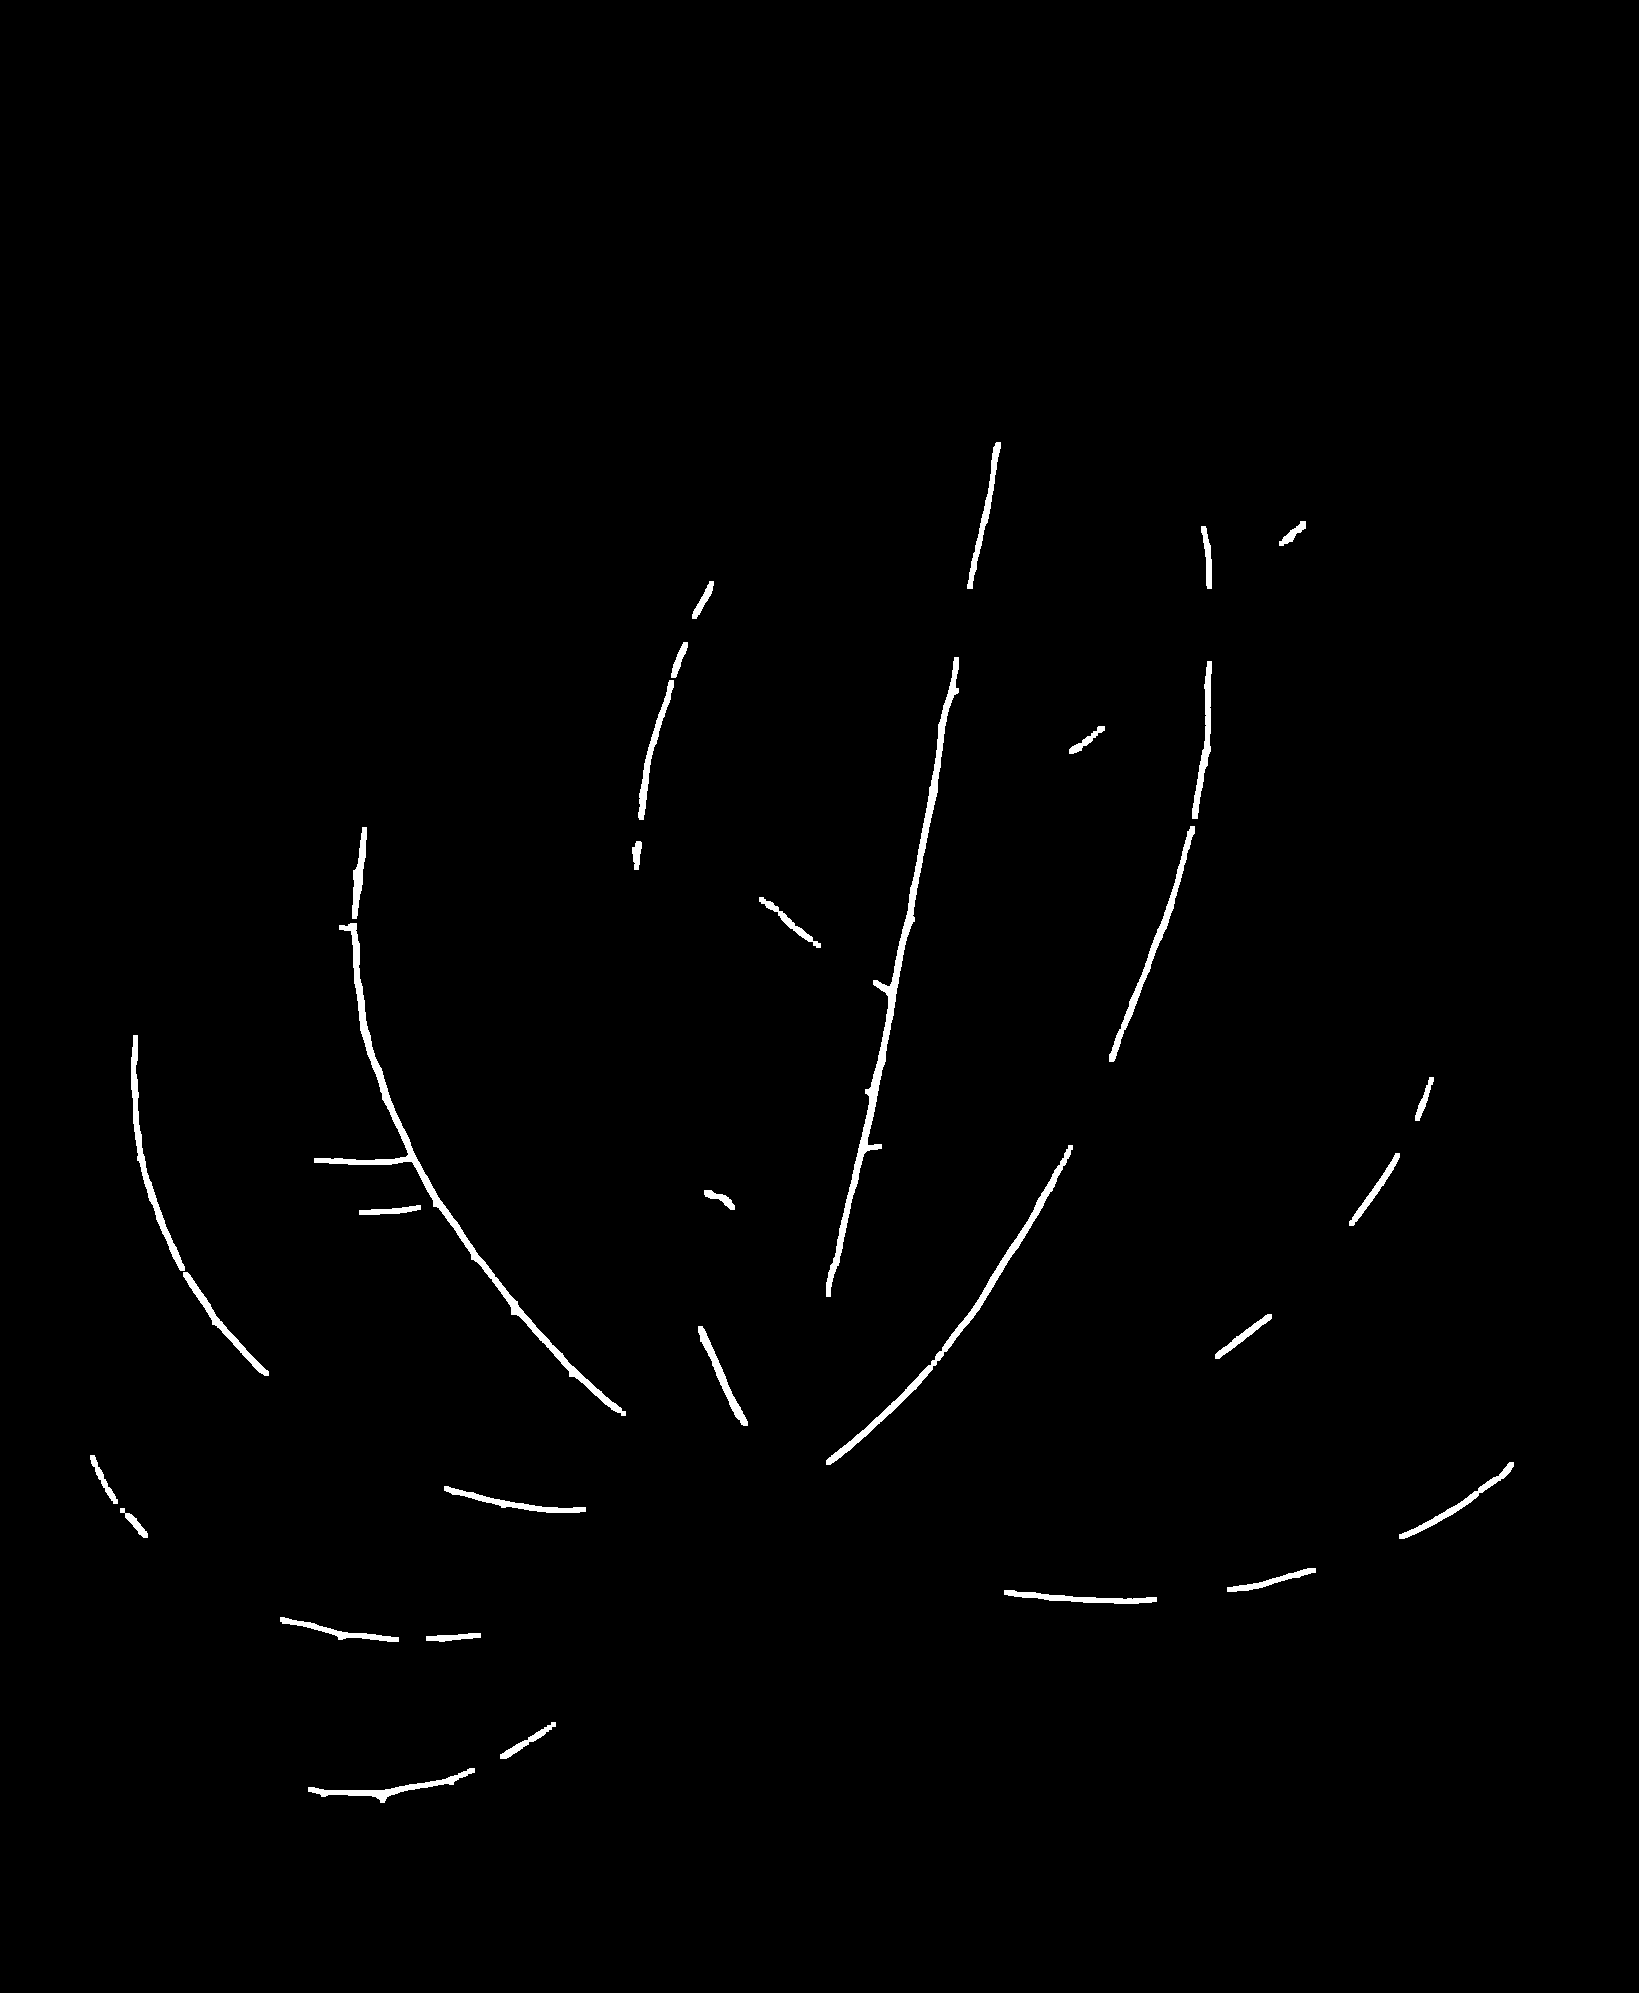

Number of branching points: 14


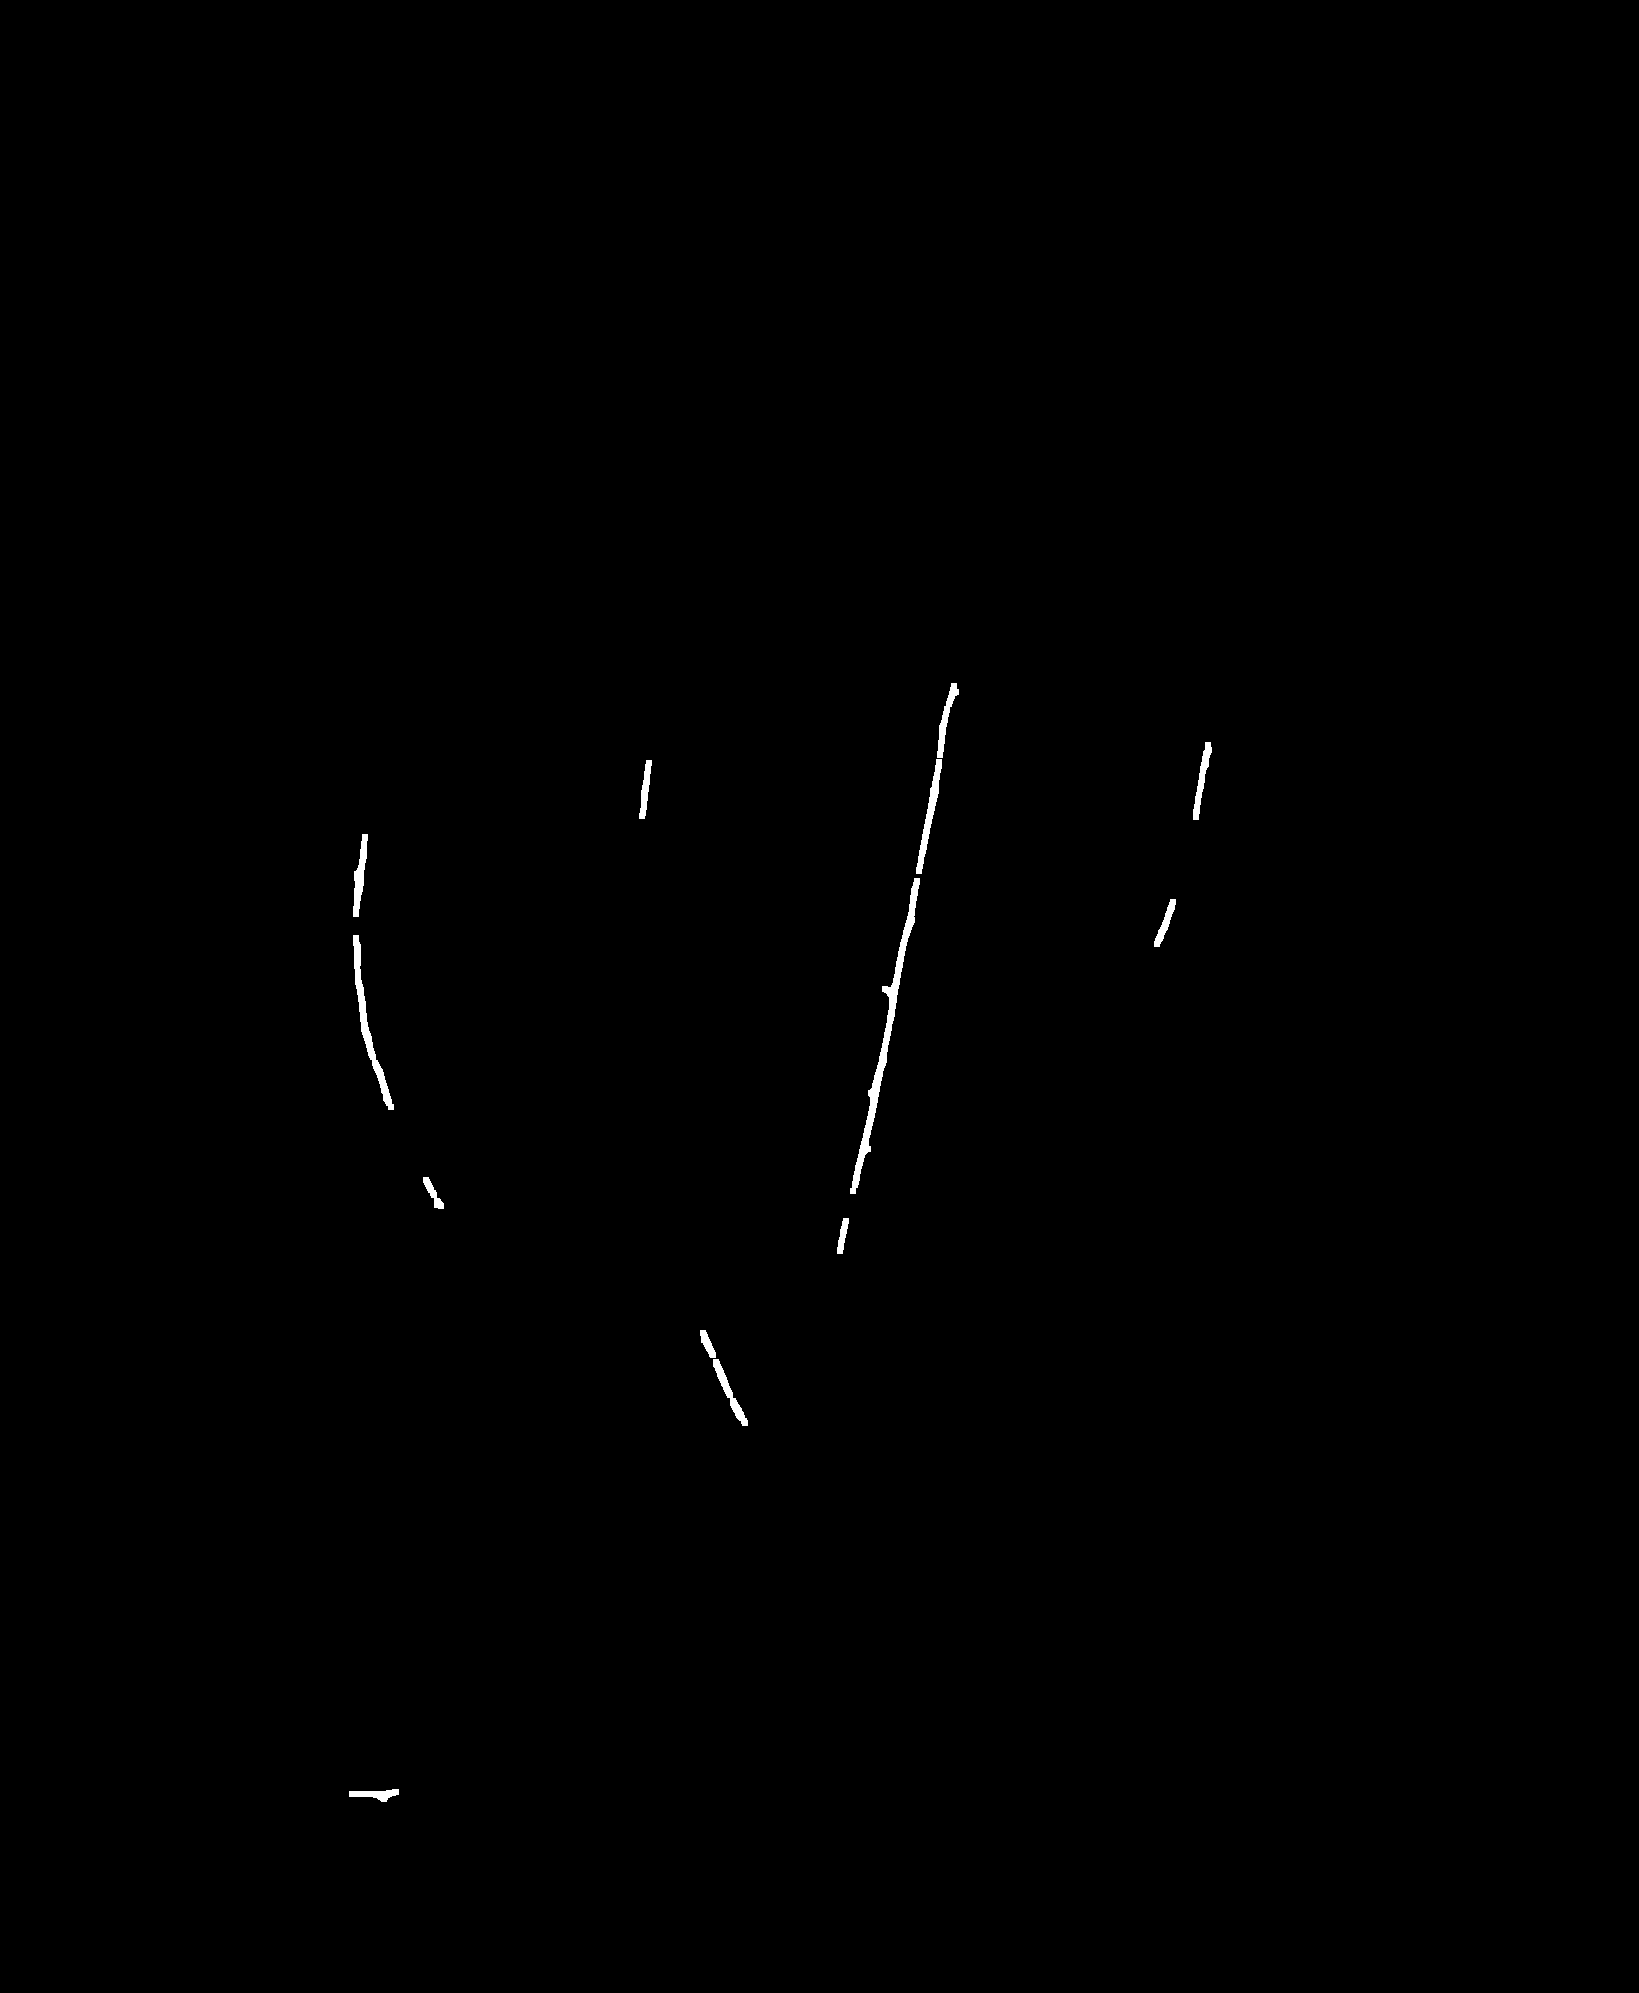

Number of branching points: 4


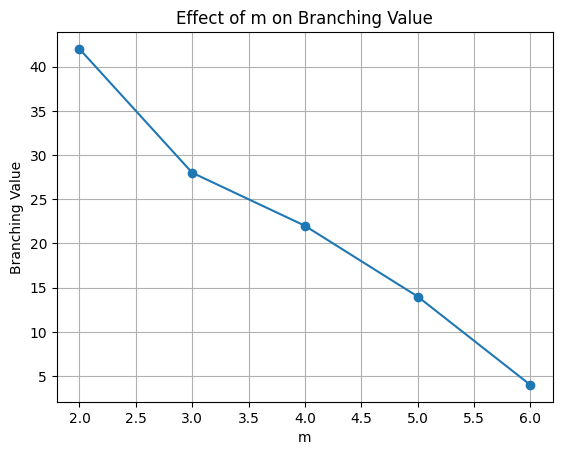

In [ ]:
import matplotlib.pyplot as plt

# Define a range of values for m (from 2 to 6)
m_values = list(range(2, 7))

# Initialize an empty list to store the results
branching_values = []

# Loop through different values of m
for m in m_values:
    # Assuming the functions filter_thin_structures and filter_small_structures are defined
    binary_mask = cv2.imread('/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds/00179839_leaf_0_bot.png', cv2.IMREAD_GRAYSCALE)
    mask1 = filter_thin_structures(binary_mask, kernel_size=m)
    mask2 = filter_small_structures(mask1)
    branching_value = measure_branching(mask2)
    branching_values.append(branching_value)

# Create a plot
plt.plot(m_values, branching_values, marker='o')
plt.xlabel('m')
plt.ylabel('Branching Value')
plt.title('Effect of m on Branching Value')
plt.grid(True)
plt.show()

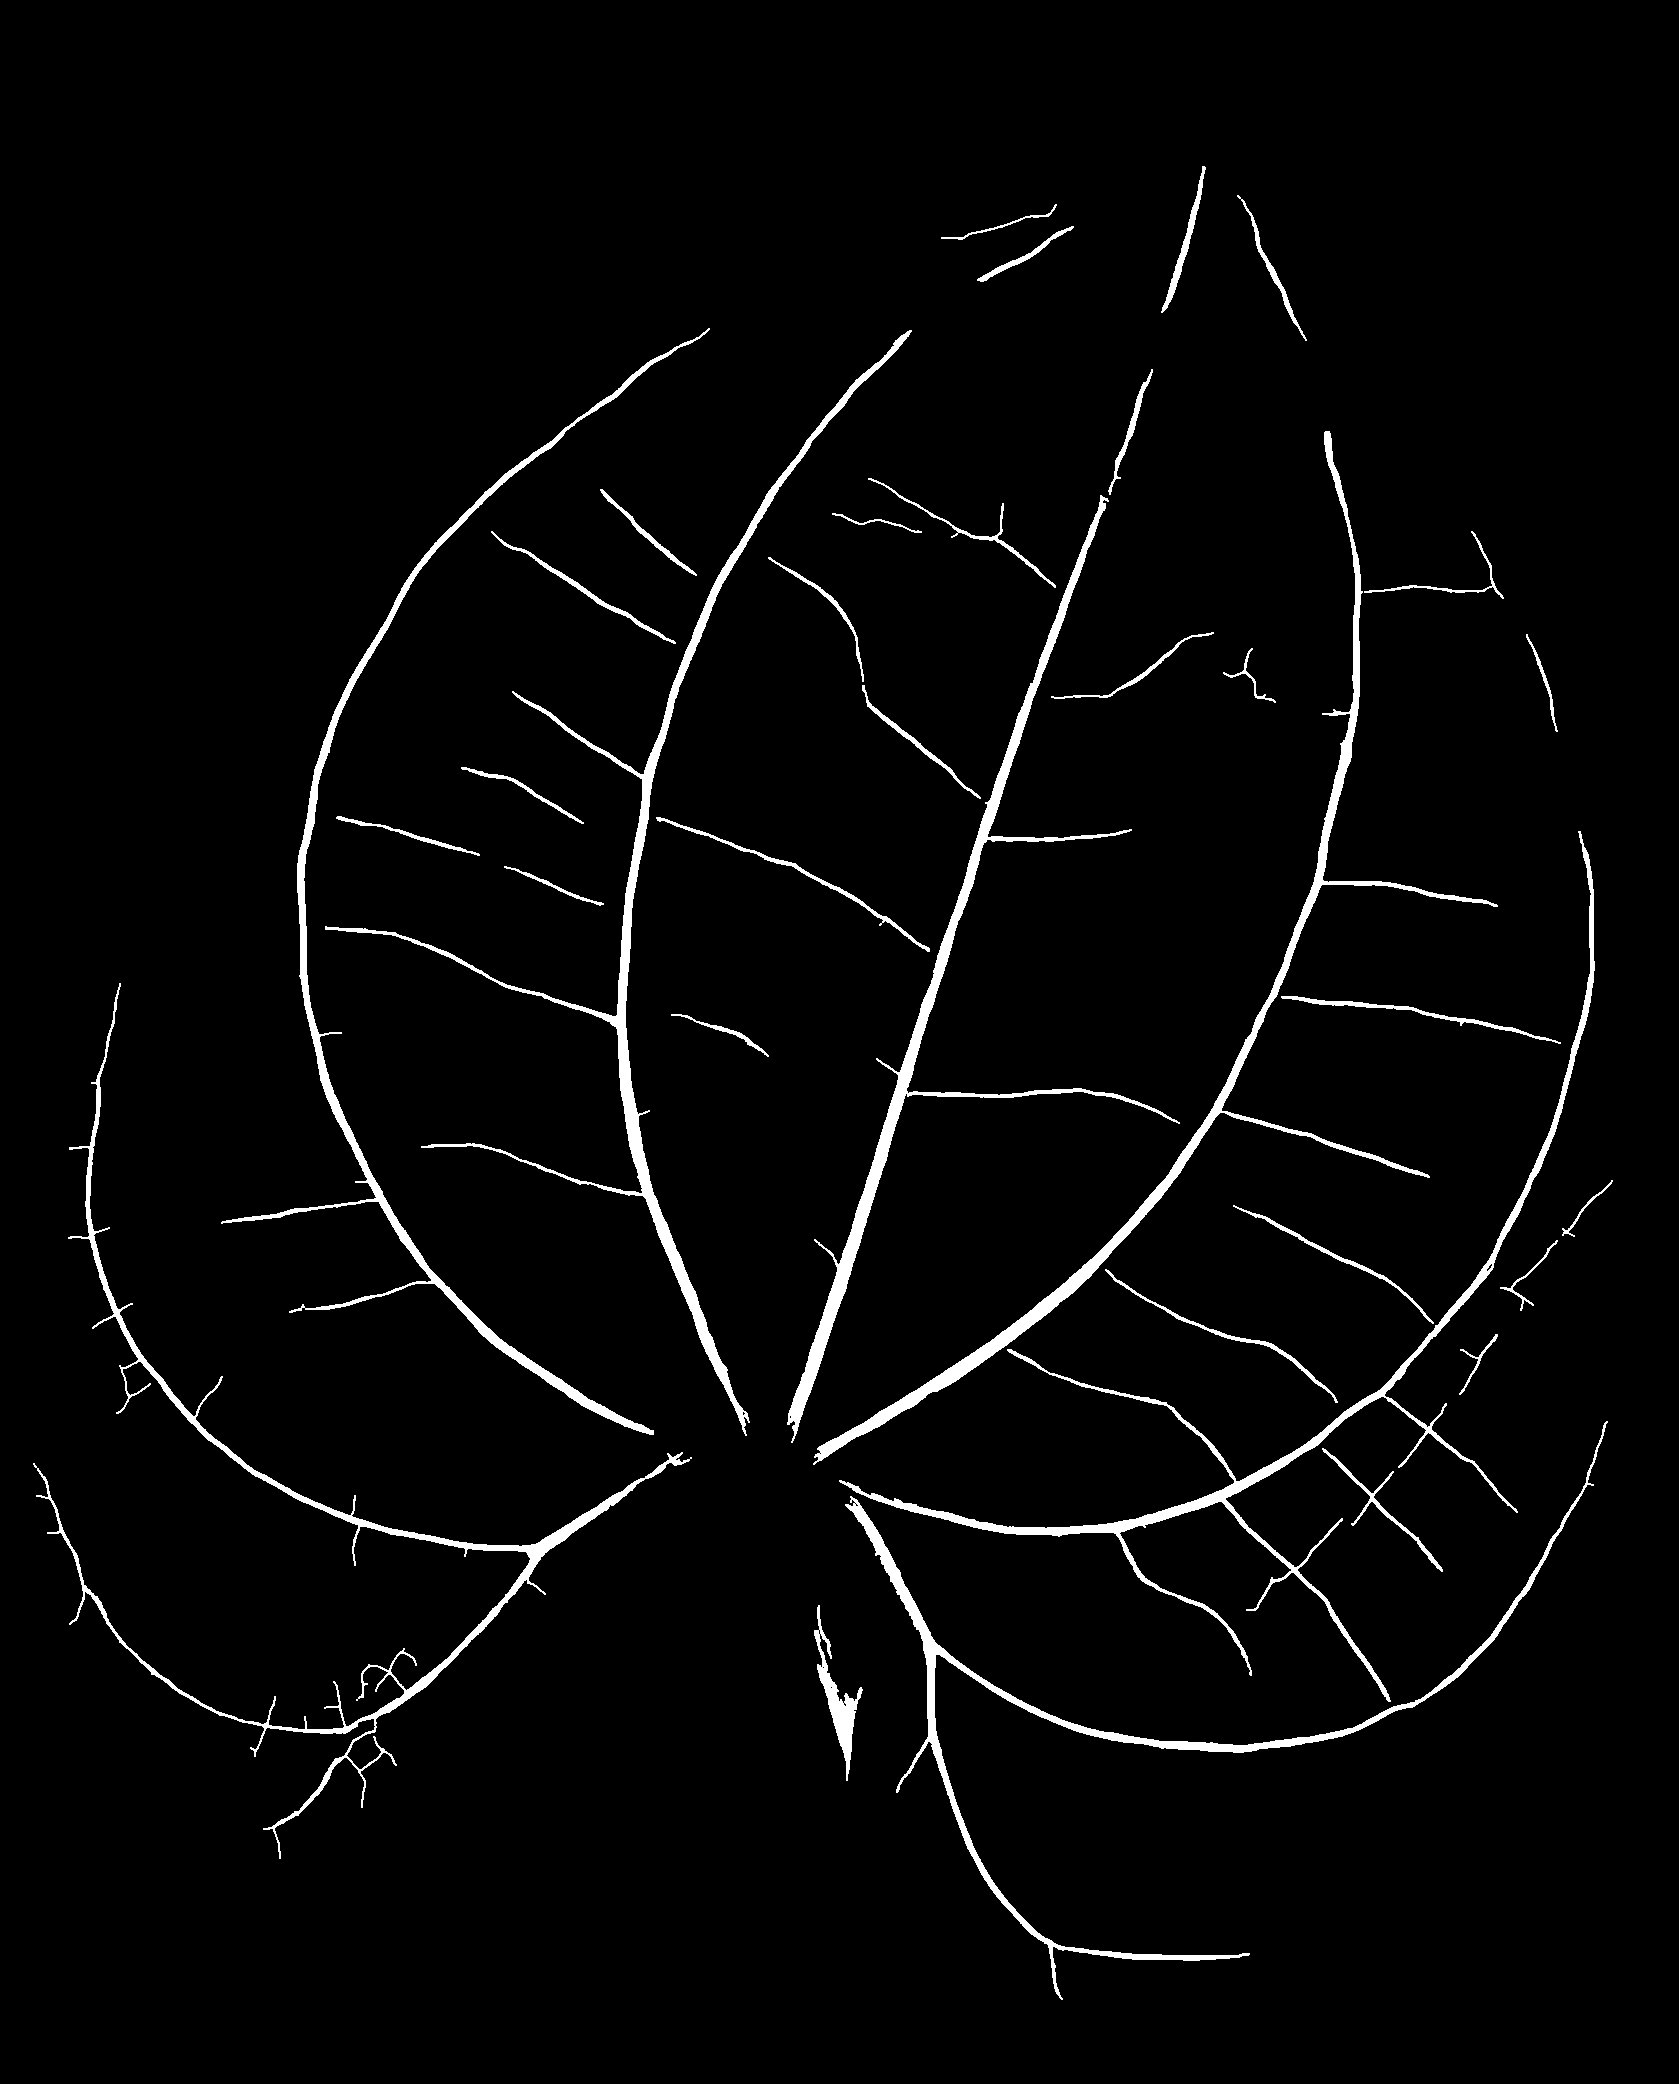

Number of branching points: 122


122

In [ ]:
binary_mask = cv2.imread('/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds/00179829_leaf_0_bot.png', cv2.IMREAD_GRAYSCALE)

m = 2
mask1 = filter_thin_structures(binary_mask, kernel_size = m)
mask2 = filter_small_structures(mask1)
measure_branching(mask2)

In [ ]:
skeleton = morphology.skeletonize(mask2*1/255)
sk = skan.Skeleton(skeleton)

In [ ]:
sk=sk2

In [ ]:
import skan
import pandas as pd

# Assuming 'skeleton' is your skeleton graph
branch_data = skan.summarize(sk)

# Calculate the mean of the 'branch-distance' column
mean_branch_distance = branch_data['branch-distance'].mean()

# Filter rows where 'branch-type' is not 1 and 'branch-distance' is greater than or equal to the mean
filtered_branch_data = branch_data[~((branch_data['branch-type'] != 1) | (branch_data['branch-distance'] >= mean_branch_distance))]

In [ ]:
# Find the index of the row with the max 'branch-distance' value
max_distance_row_index = branch_data['branch-distance'].idxmax()

# Retrieve the entire row with the max 'branch-distance'
max_distance_row = branch_data.loc[max_distance_row_index]

print(max_distance_row)

skeleton-id              4.000000
node-id-src            492.000000
node-id-dst           8186.000000
branch-distance       1106.697618
branch-type              1.000000
mean-pixel-value         1.000000
stdev-pixel-value        0.000000
image-coord-src-0      328.000000
image-coord-src-1      709.000000
image-coord-dst-0     1198.000000
image-coord-dst-1      379.000000
coord-src-0            328.000000
coord-src-1            709.000000
coord-dst-0           1198.000000
coord-dst-1            379.000000
euclidean-distance     930.483745
Name: 4, dtype: float64


In [ ]:
filtered_branch_data

4

In [ ]:
filtered_branch_data.index

Index([  3,   6,   7,   9,  10,  11,  12,  13,  15,  17,
       ...
       125, 126, 127, 128, 129, 130, 131, 133, 134, 135],
      dtype='int64', length=105)

In [ ]:
sk.skeleton_image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

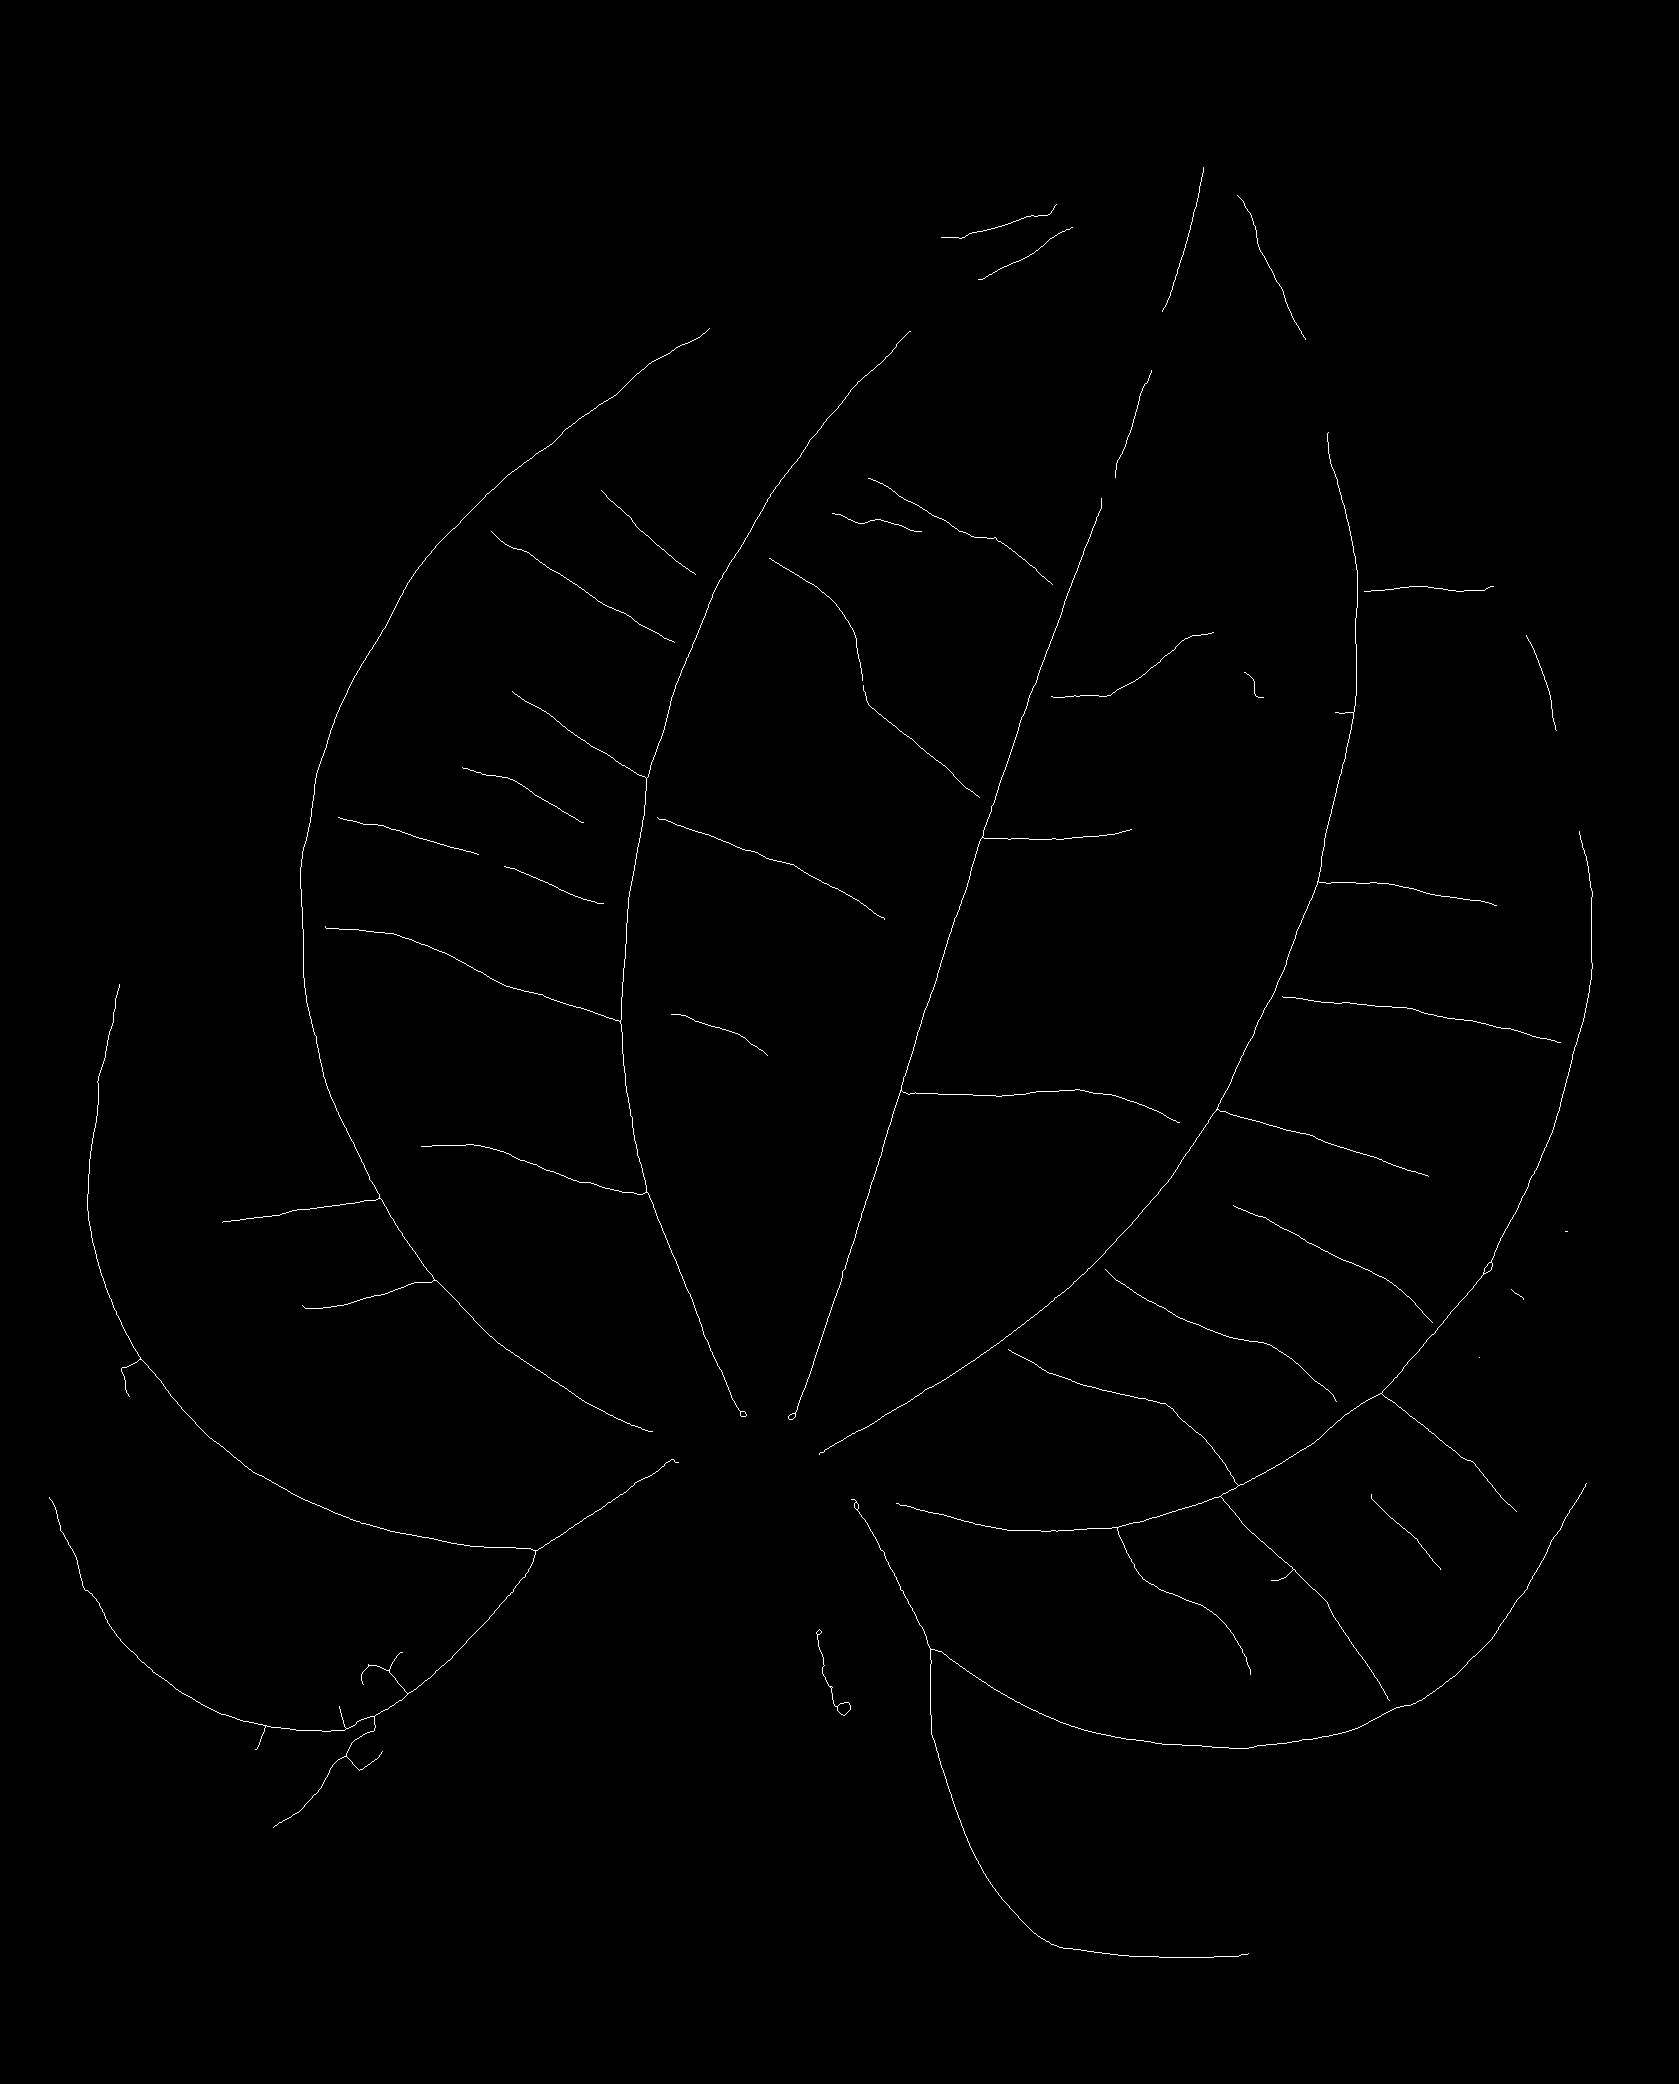

In [ ]:


# Display the skeleton using OpenCV
cv2_imshow(sk.skeleton_image * 255)

In [ ]:
unique_values = np.unique(sk.path_label_image())

In [ ]:
sk2 = sk.prune_paths(filtered_branch_data.index)

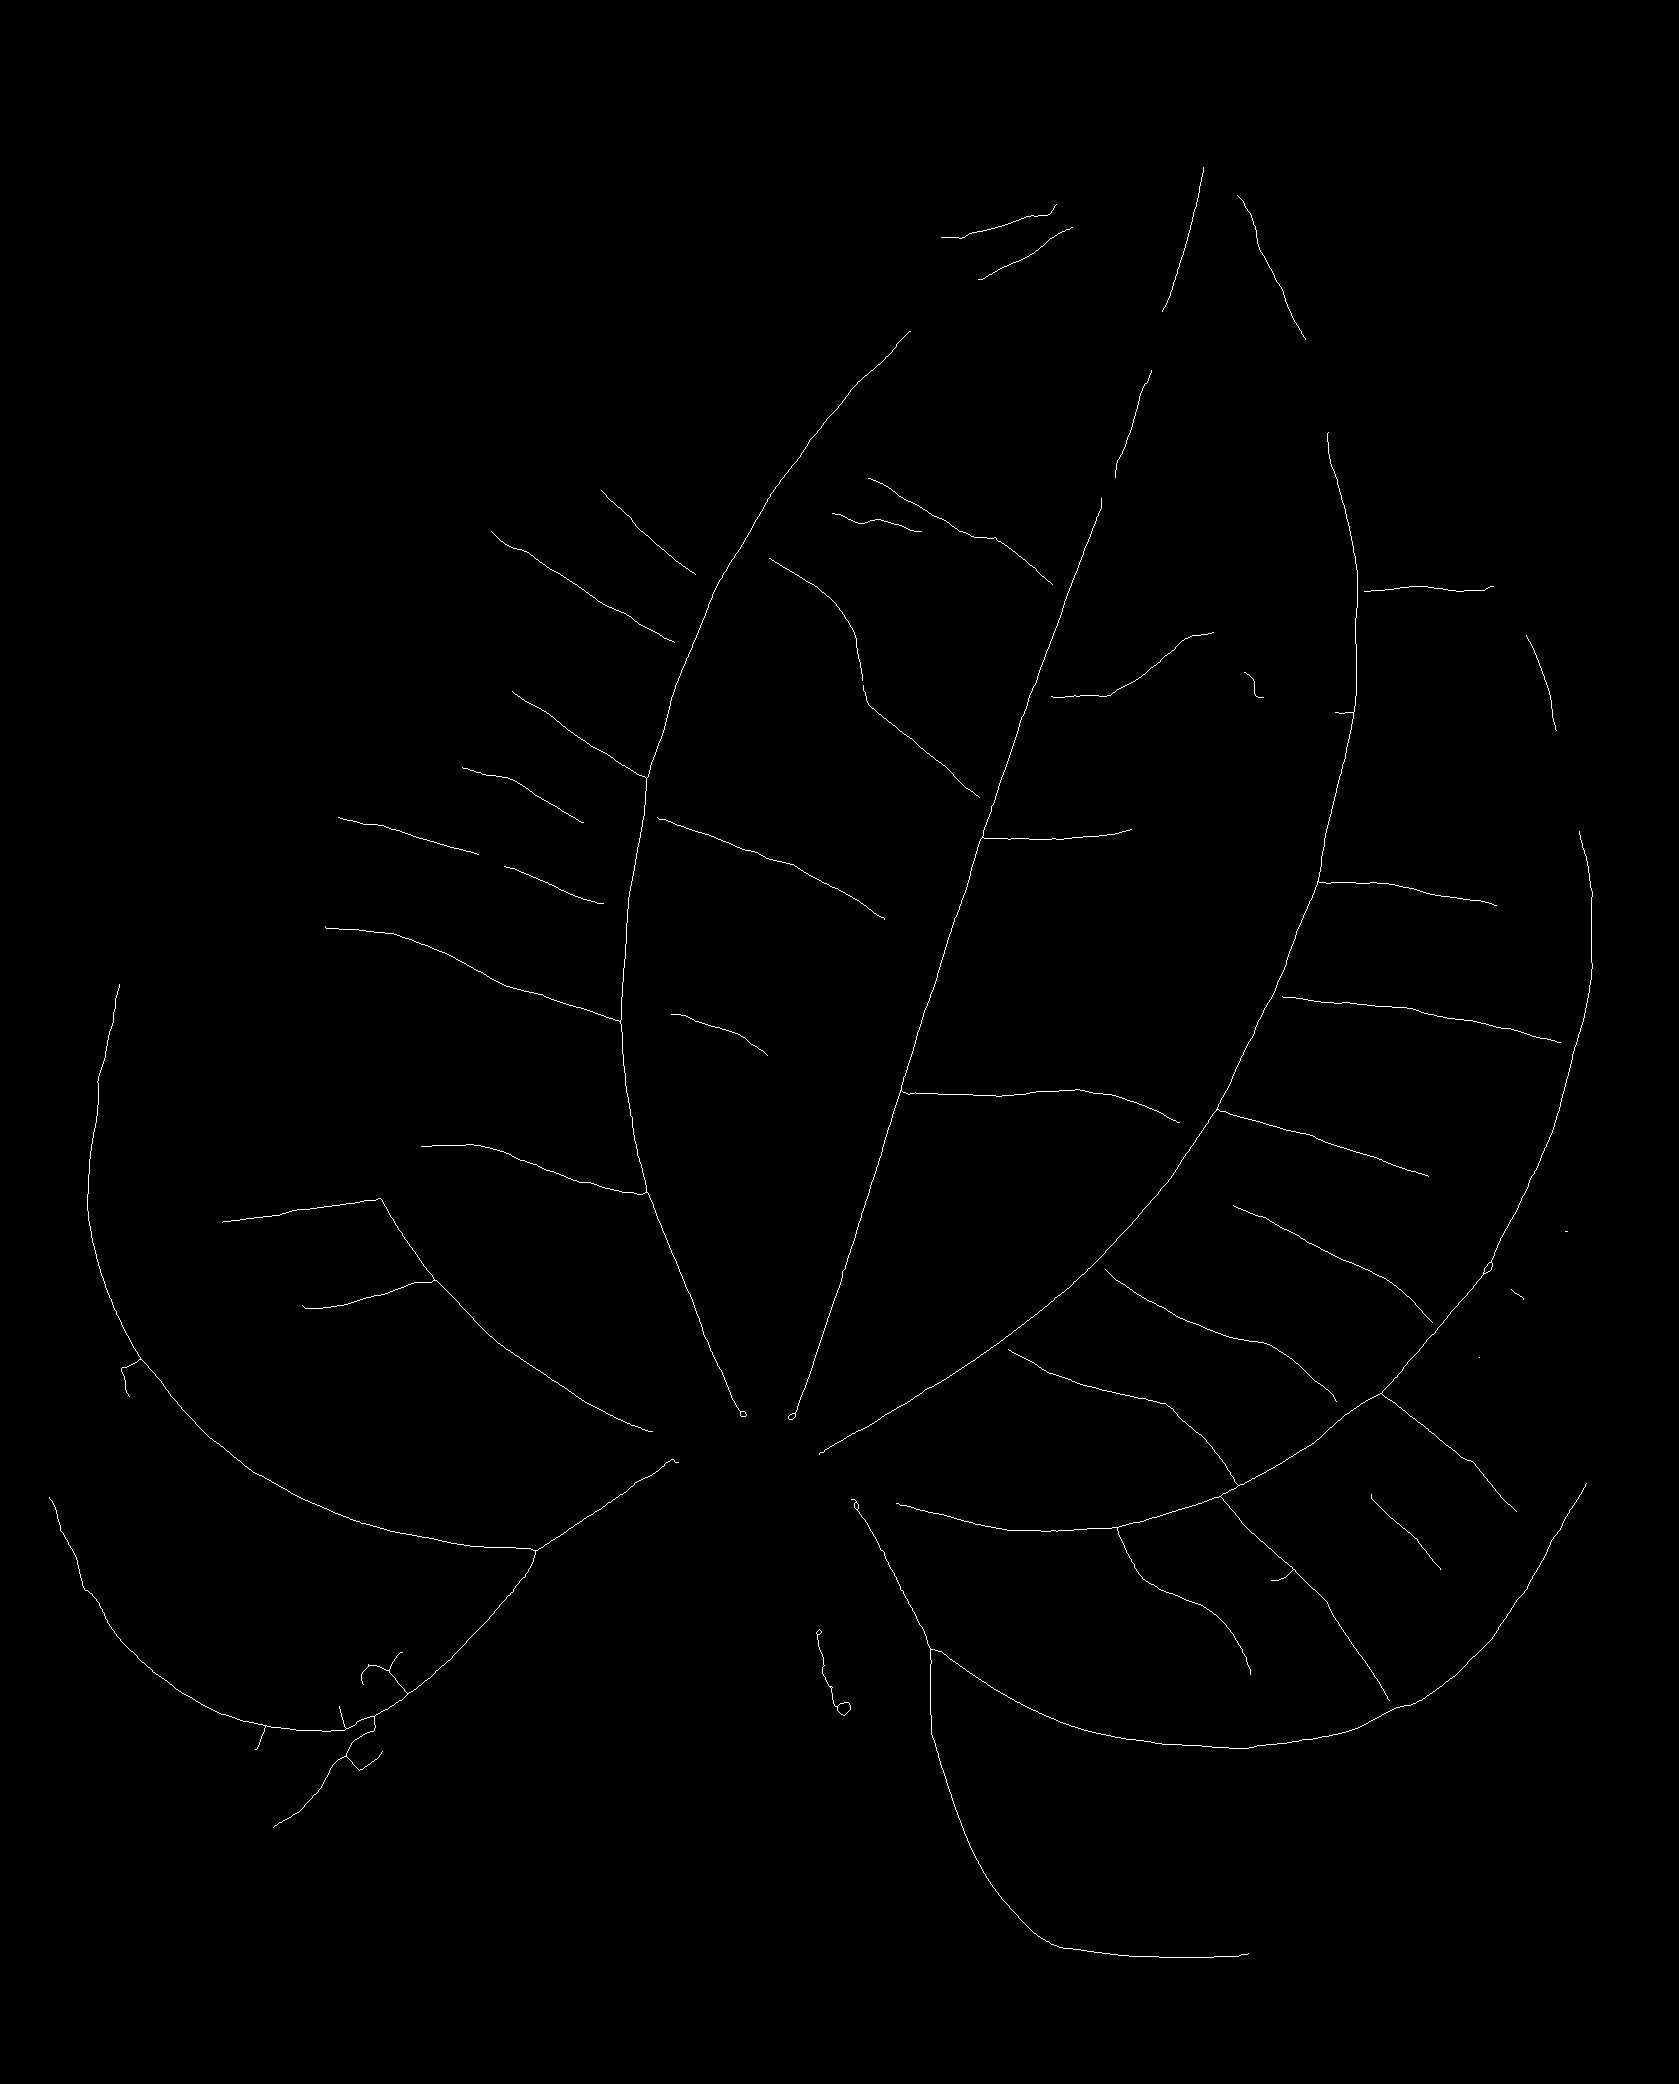

In [ ]:
cv2_imshow(sk2.skeleton_image * 255)

In [ ]:
unique_values.shape

(136,)

In [145]:


import skan
import pandas as pd
from skimage.morphology import medial_axis
binary_mask = cv2.imread('/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds/00248140_leaf_0_bot.png', cv2.IMREAD_GRAYSCALE)
def skeleton_pruning(binary_mask):
  # Compute the medial axis (skeleton) and the distance transform
  skel, distance = medial_axis(binary_mask, return_distance=True)

  # Distance to the background for pixels of the skeleton
  dist_on_skel = distance * skel

  # Draw
  _, binary_skel = cv2.threshold(dist_on_skel, 1, 255, cv2.THRESH_BINARY)
  cv2_imshow(binary_skel)

  #Branch data extraction
  sk = skan.csr.Skeleton(dist_on_skel, value_is_height=True)
  original_branch_data = skan.summarize(sk)

  mean_thickness = original_branch_data['mean-pixel-value'].mean()
  std_thickness = original_branch_data['mean-pixel-value'].std()

  mean_distance = original_branch_data['branch-distance'].mean()
  std_distance = original_branch_data['branch-distance'].std()


  # Calculate the thresholds
  threshold_thickness = mean_thickness + 0.5*std_thickness
  threshold_distance = mean_distance - std_distance

  # Filter the DataFrame
  filtered_data1 = original_branch_data[
      (original_branch_data['mean-pixel-value'] < threshold_thickness) |
      (original_branch_data['branch-distance'] < threshold_distance)
  ]

  # Filter the skeleton
  sk = sk.prune_paths(filtered_data1.index)

  sk2 = sk
  sk = sk2
  branch_data = summarize(sk2)
  draw.overlay_euclidean_skeleton_2d(binary_mask, branch_data,
                                   skeleton_color_source='branch-type')
  for i in range(2):
    # Assuming 'skeleton' is your skeleton graph
    branch_data = skan.summarize(sk)

    # Filter thin branches
    mean_thickness = branch_data['mean-pixel-value'].mean()
    print(mean_thickness)
    std_thickness = branch_data['mean-pixel-value'].std()
    threshold_thickness = mean_thickness - 0.8*std_thickness

    filtered_data = branch_data[branch_data['mean-pixel-value'] < threshold_thickness]
    sk = sk.prune_paths(filtered_data.index)
    branch_data = skan.summarize(sk)

    # Calculate the mean of the 'branch-distance' column
    mean_distance = branch_data['branch-distance'].mean()
    std_distance = branch_data['branch-distance'].std()
    threshold_distance = mean_distance - 0.5*std_distance

    # Filter rows where 'branch-type' is 1 and 'branch-distance' is no greater than the mean
    filtered_branch_data = branch_data[(branch_data['branch-type'] != 1) &
                                       ~(branch_data['branch-distance'] > threshold_distance) &
                                       ~(branch_data['mean-pixel-value'] > threshold_thickness)
                                       ]

    sk2 = sk.prune_paths(filtered_branch_data.index)
    sk = sk2
    branch_data = summarize(sk2)
    draw.overlay_euclidean_skeleton_2d(binary_mask, branch_data,
                                   skeleton_color_source='branch-type')
  #Draw
  _, binary_sk = cv2.threshold(sk.skeleton_image, 1, 255, cv2.THRESH_BINARY)
  cv2_imshow(binary_sk)
  negative = cv2.subtract(dist_on_skel, sk2.skeleton_image)
  _, binary_negative = cv2.threshold(negative, 1, 255, cv2.THRESH_BINARY)
  return binary_negative


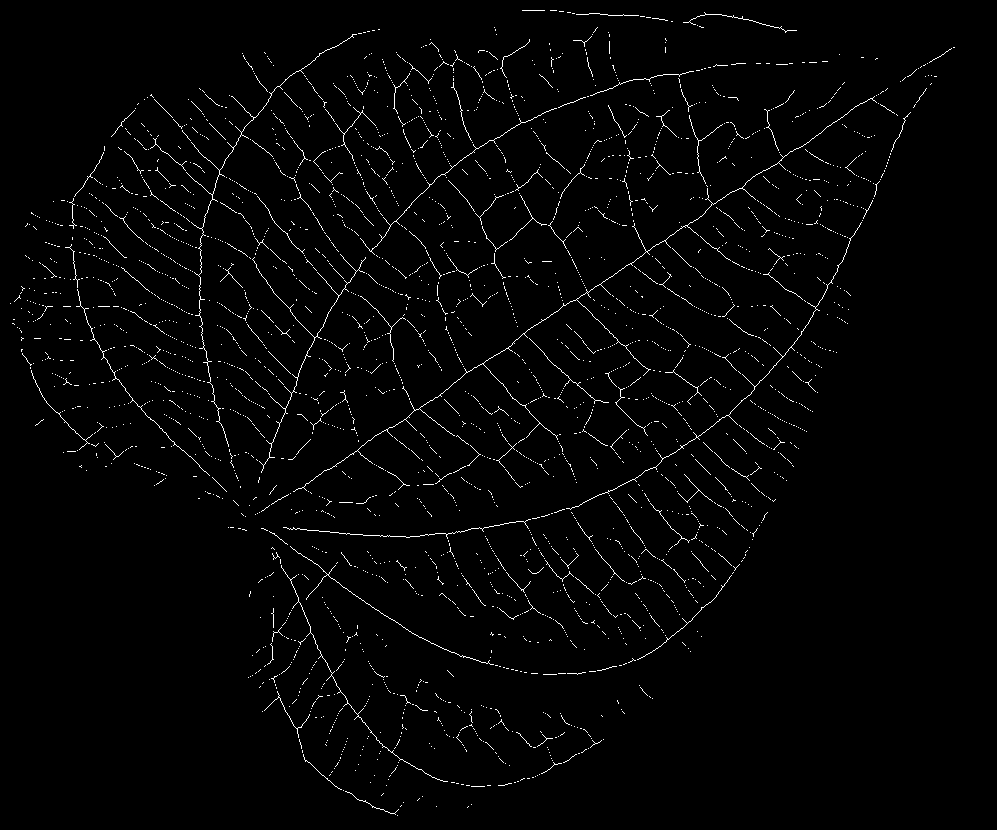

1.9126618688911232
1.9870954731847559


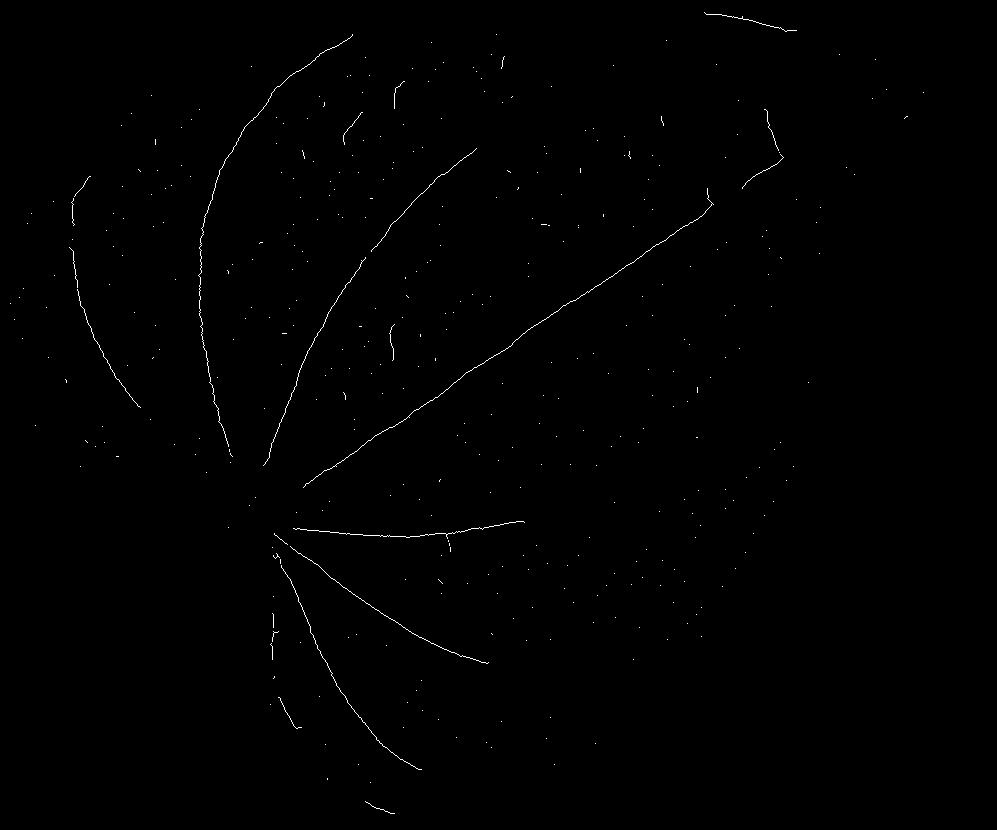

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

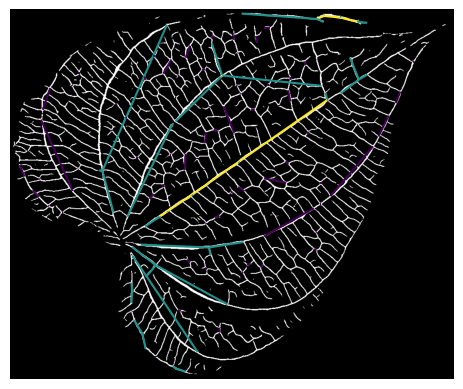

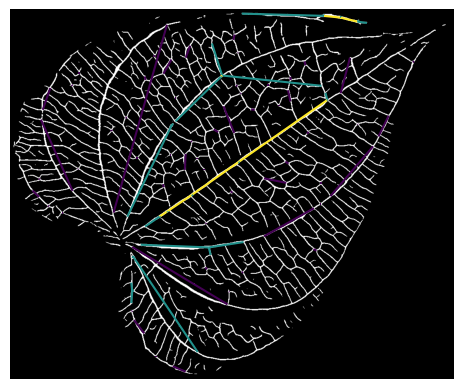

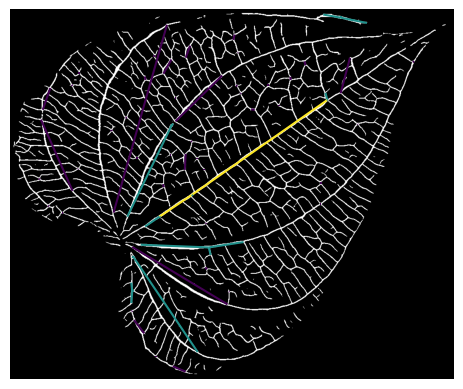

In [146]:
skeleton_pruning(binary_mask)

In [ ]:

def dilate_and_subtract(binary_mask, sk, dilation_radius = 5):
    # Perform dilation on skeleton 'sk'
    kernel = np.ones((dilation_radius, dilation_radius), np.uint8)
    dilated_sk = cv2.dilate(sk.astype(np.uint8), kernel)
    cv2_imshow(dilated_sk)

    # Subtract the dilated skeleton from the binary mask
    result_mask = cv2.subtract(binary_mask, dilated_sk)
    cv2_imshow(result_mask)
    return result_mask


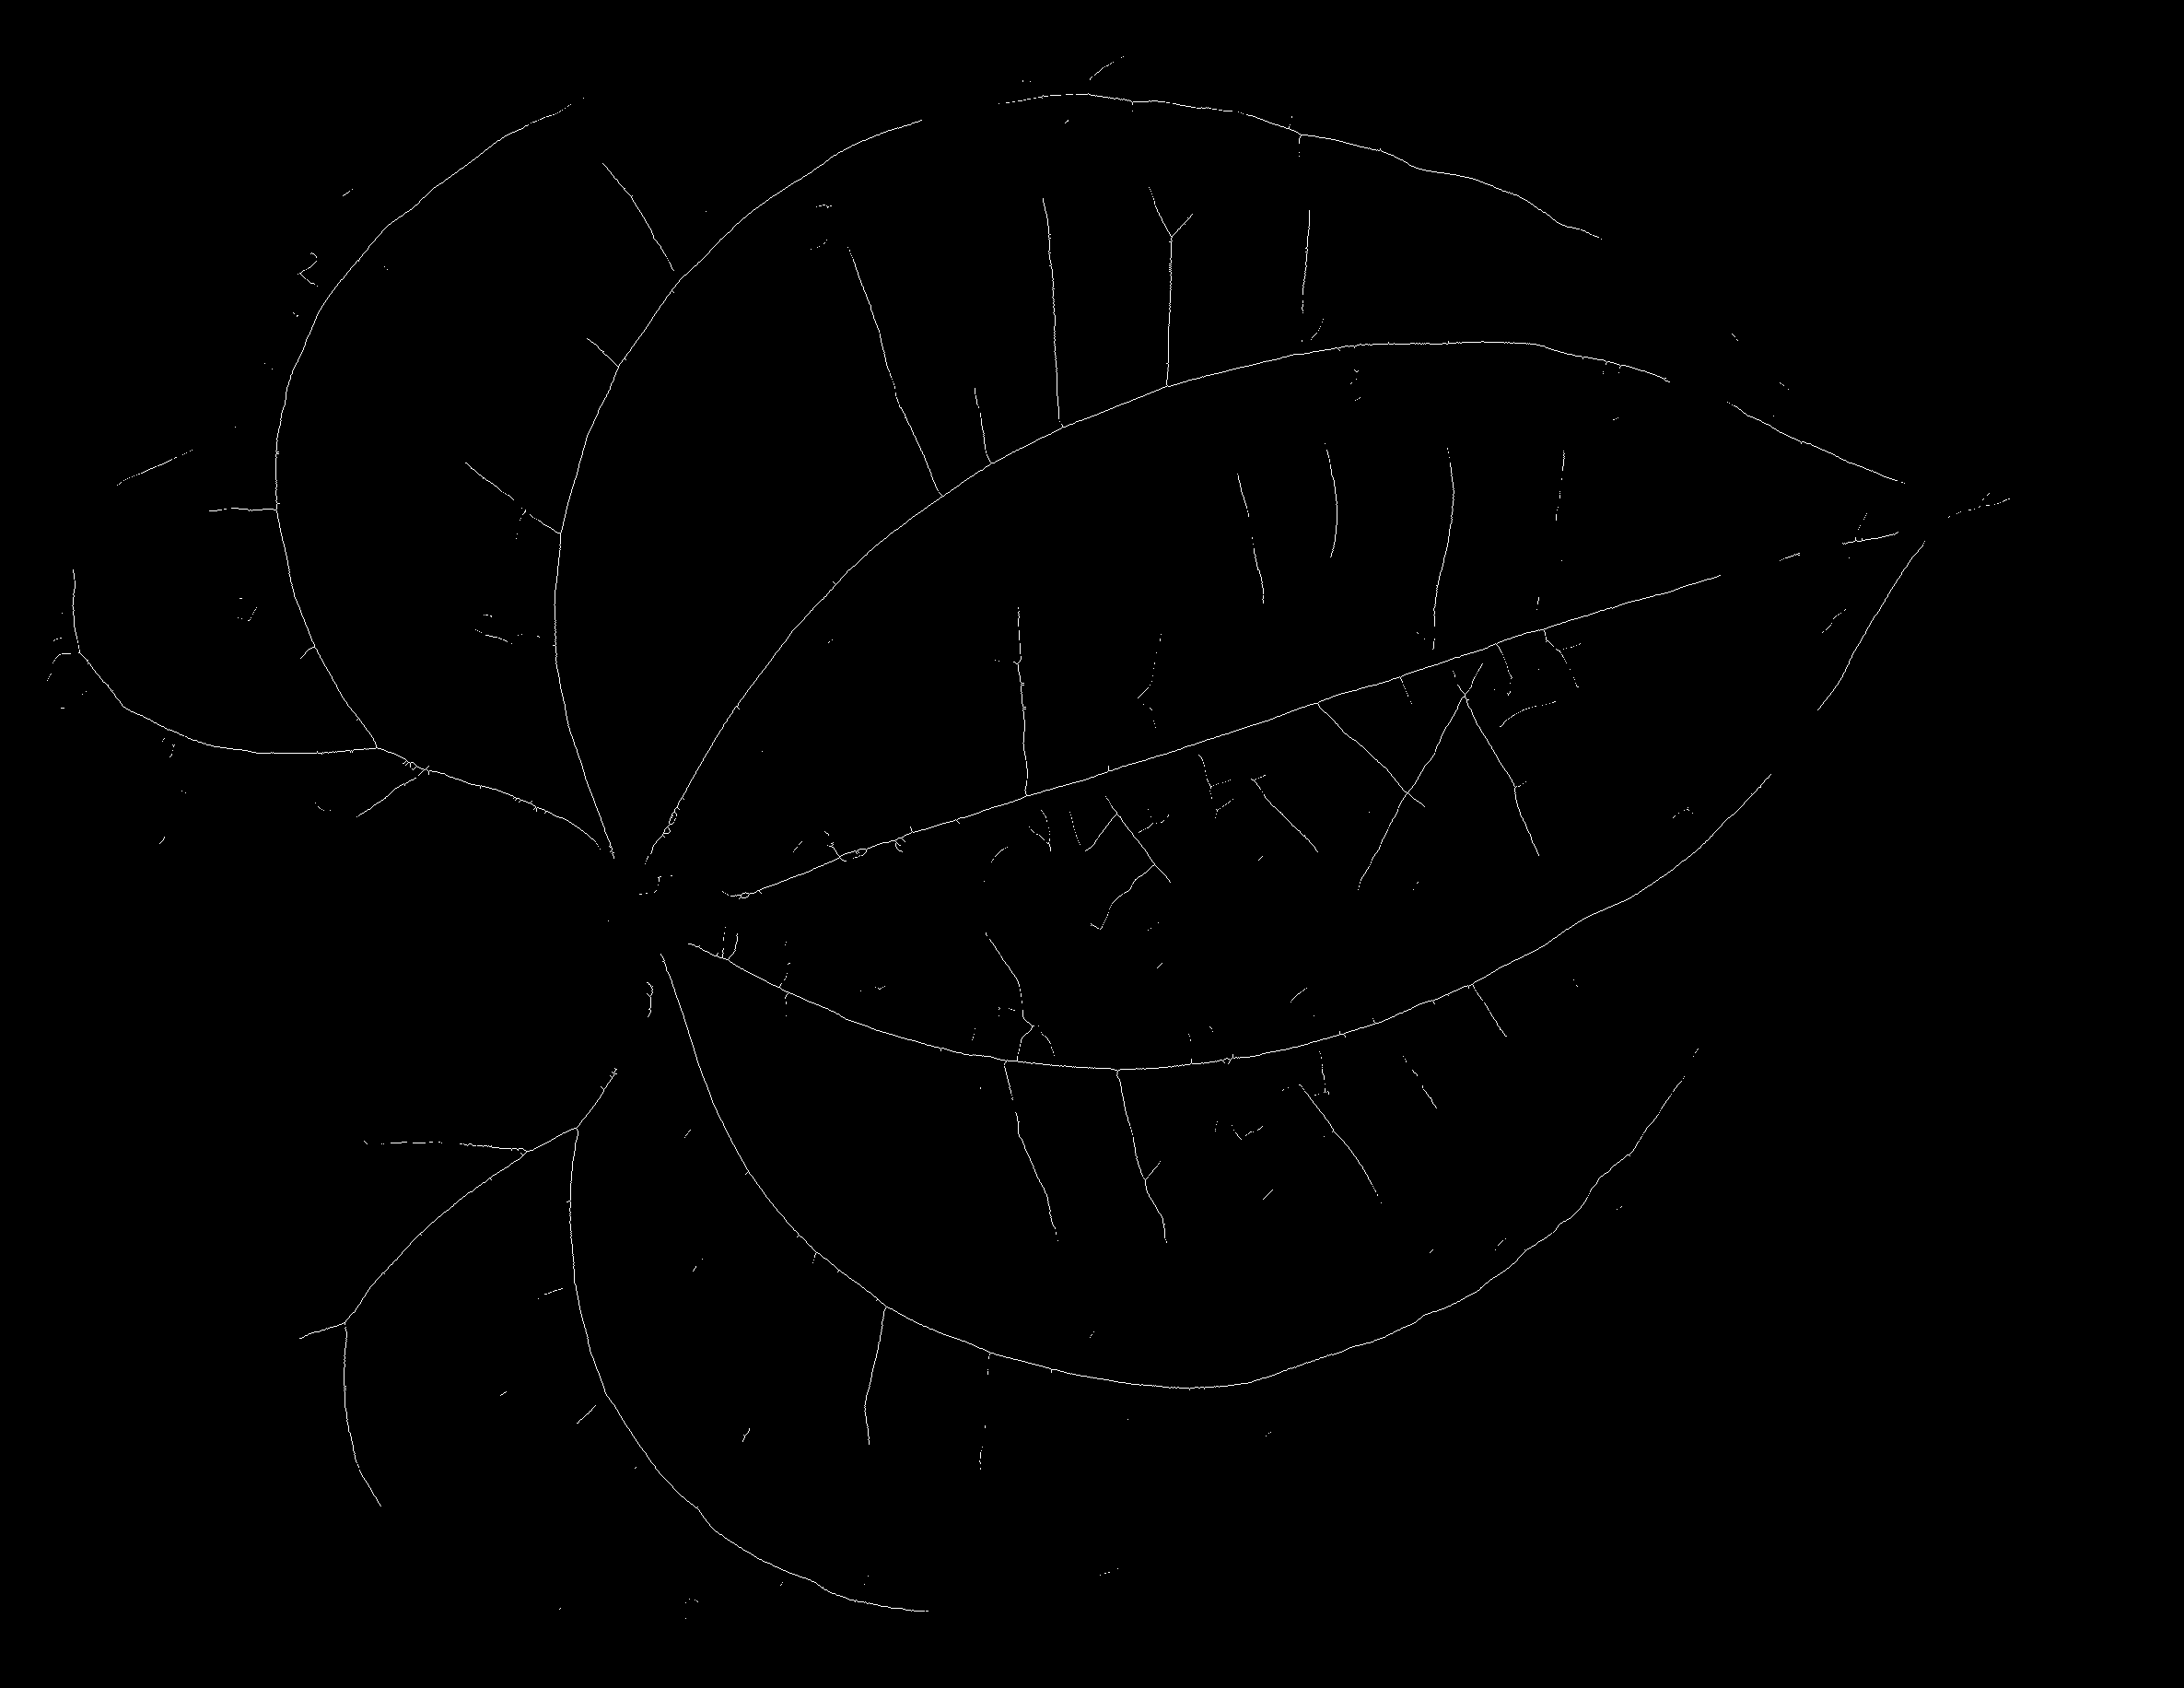

3.5395326380617944
3.652788549222172
3.7577102370396687


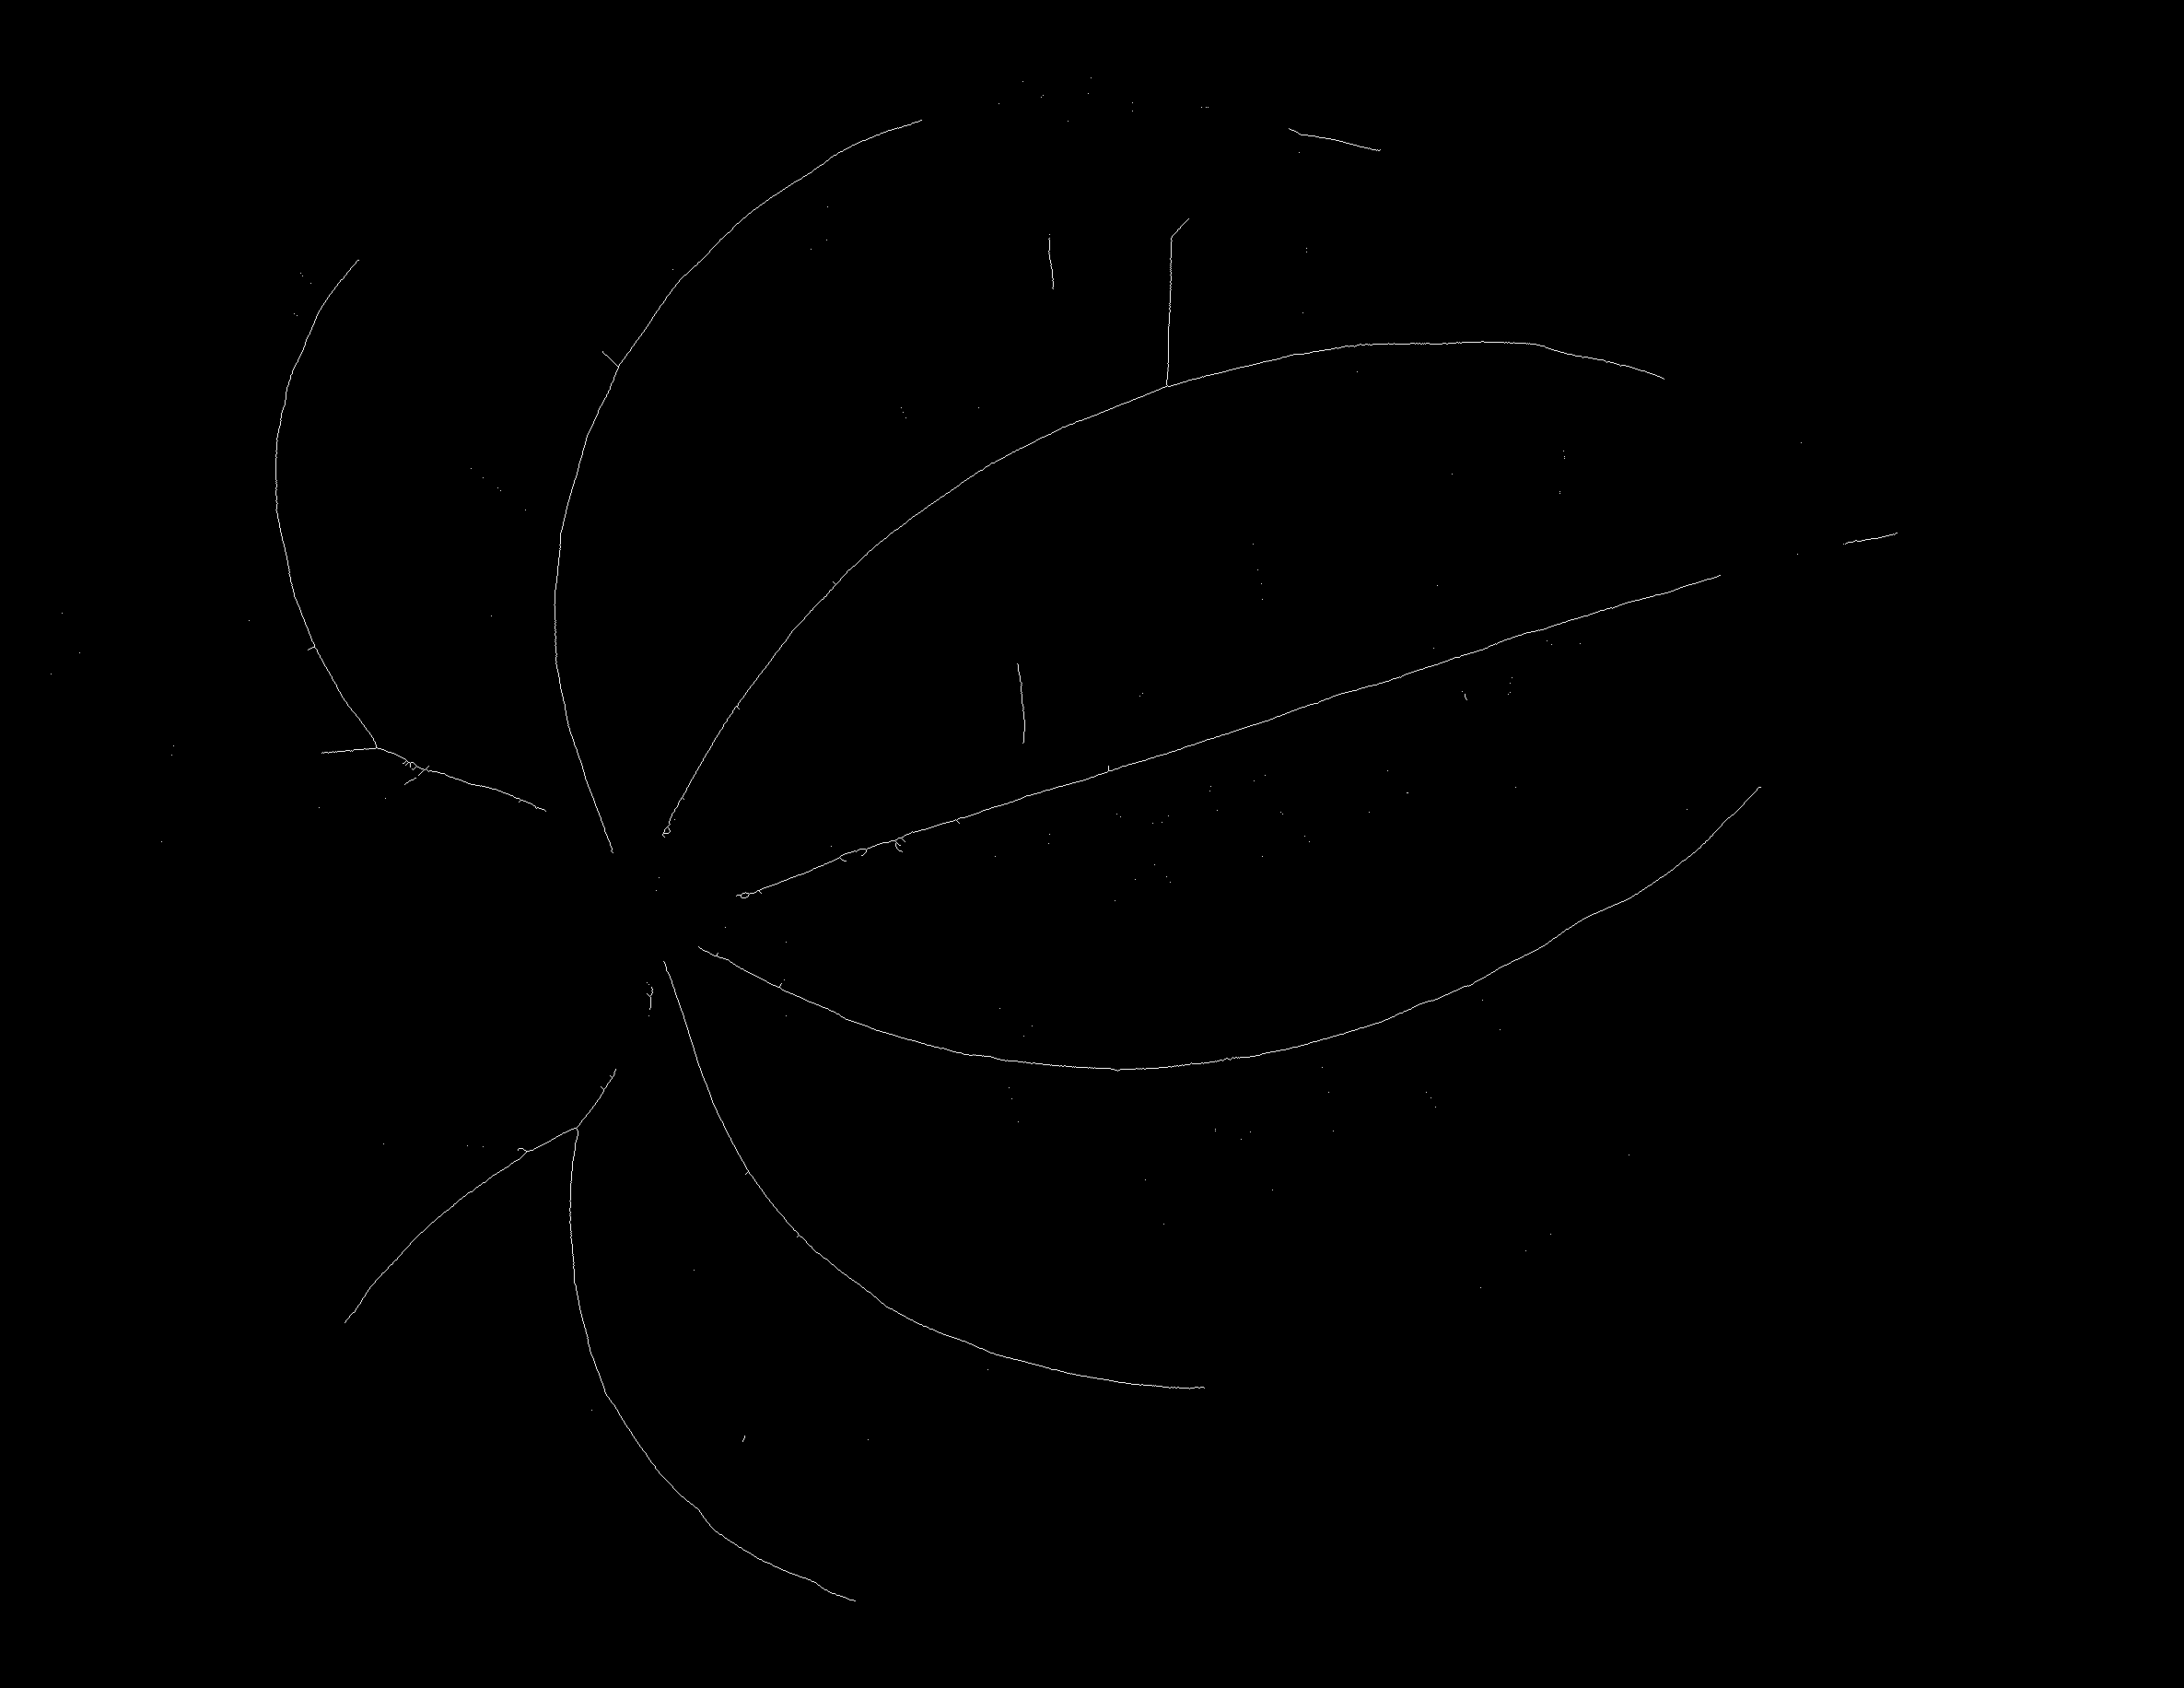

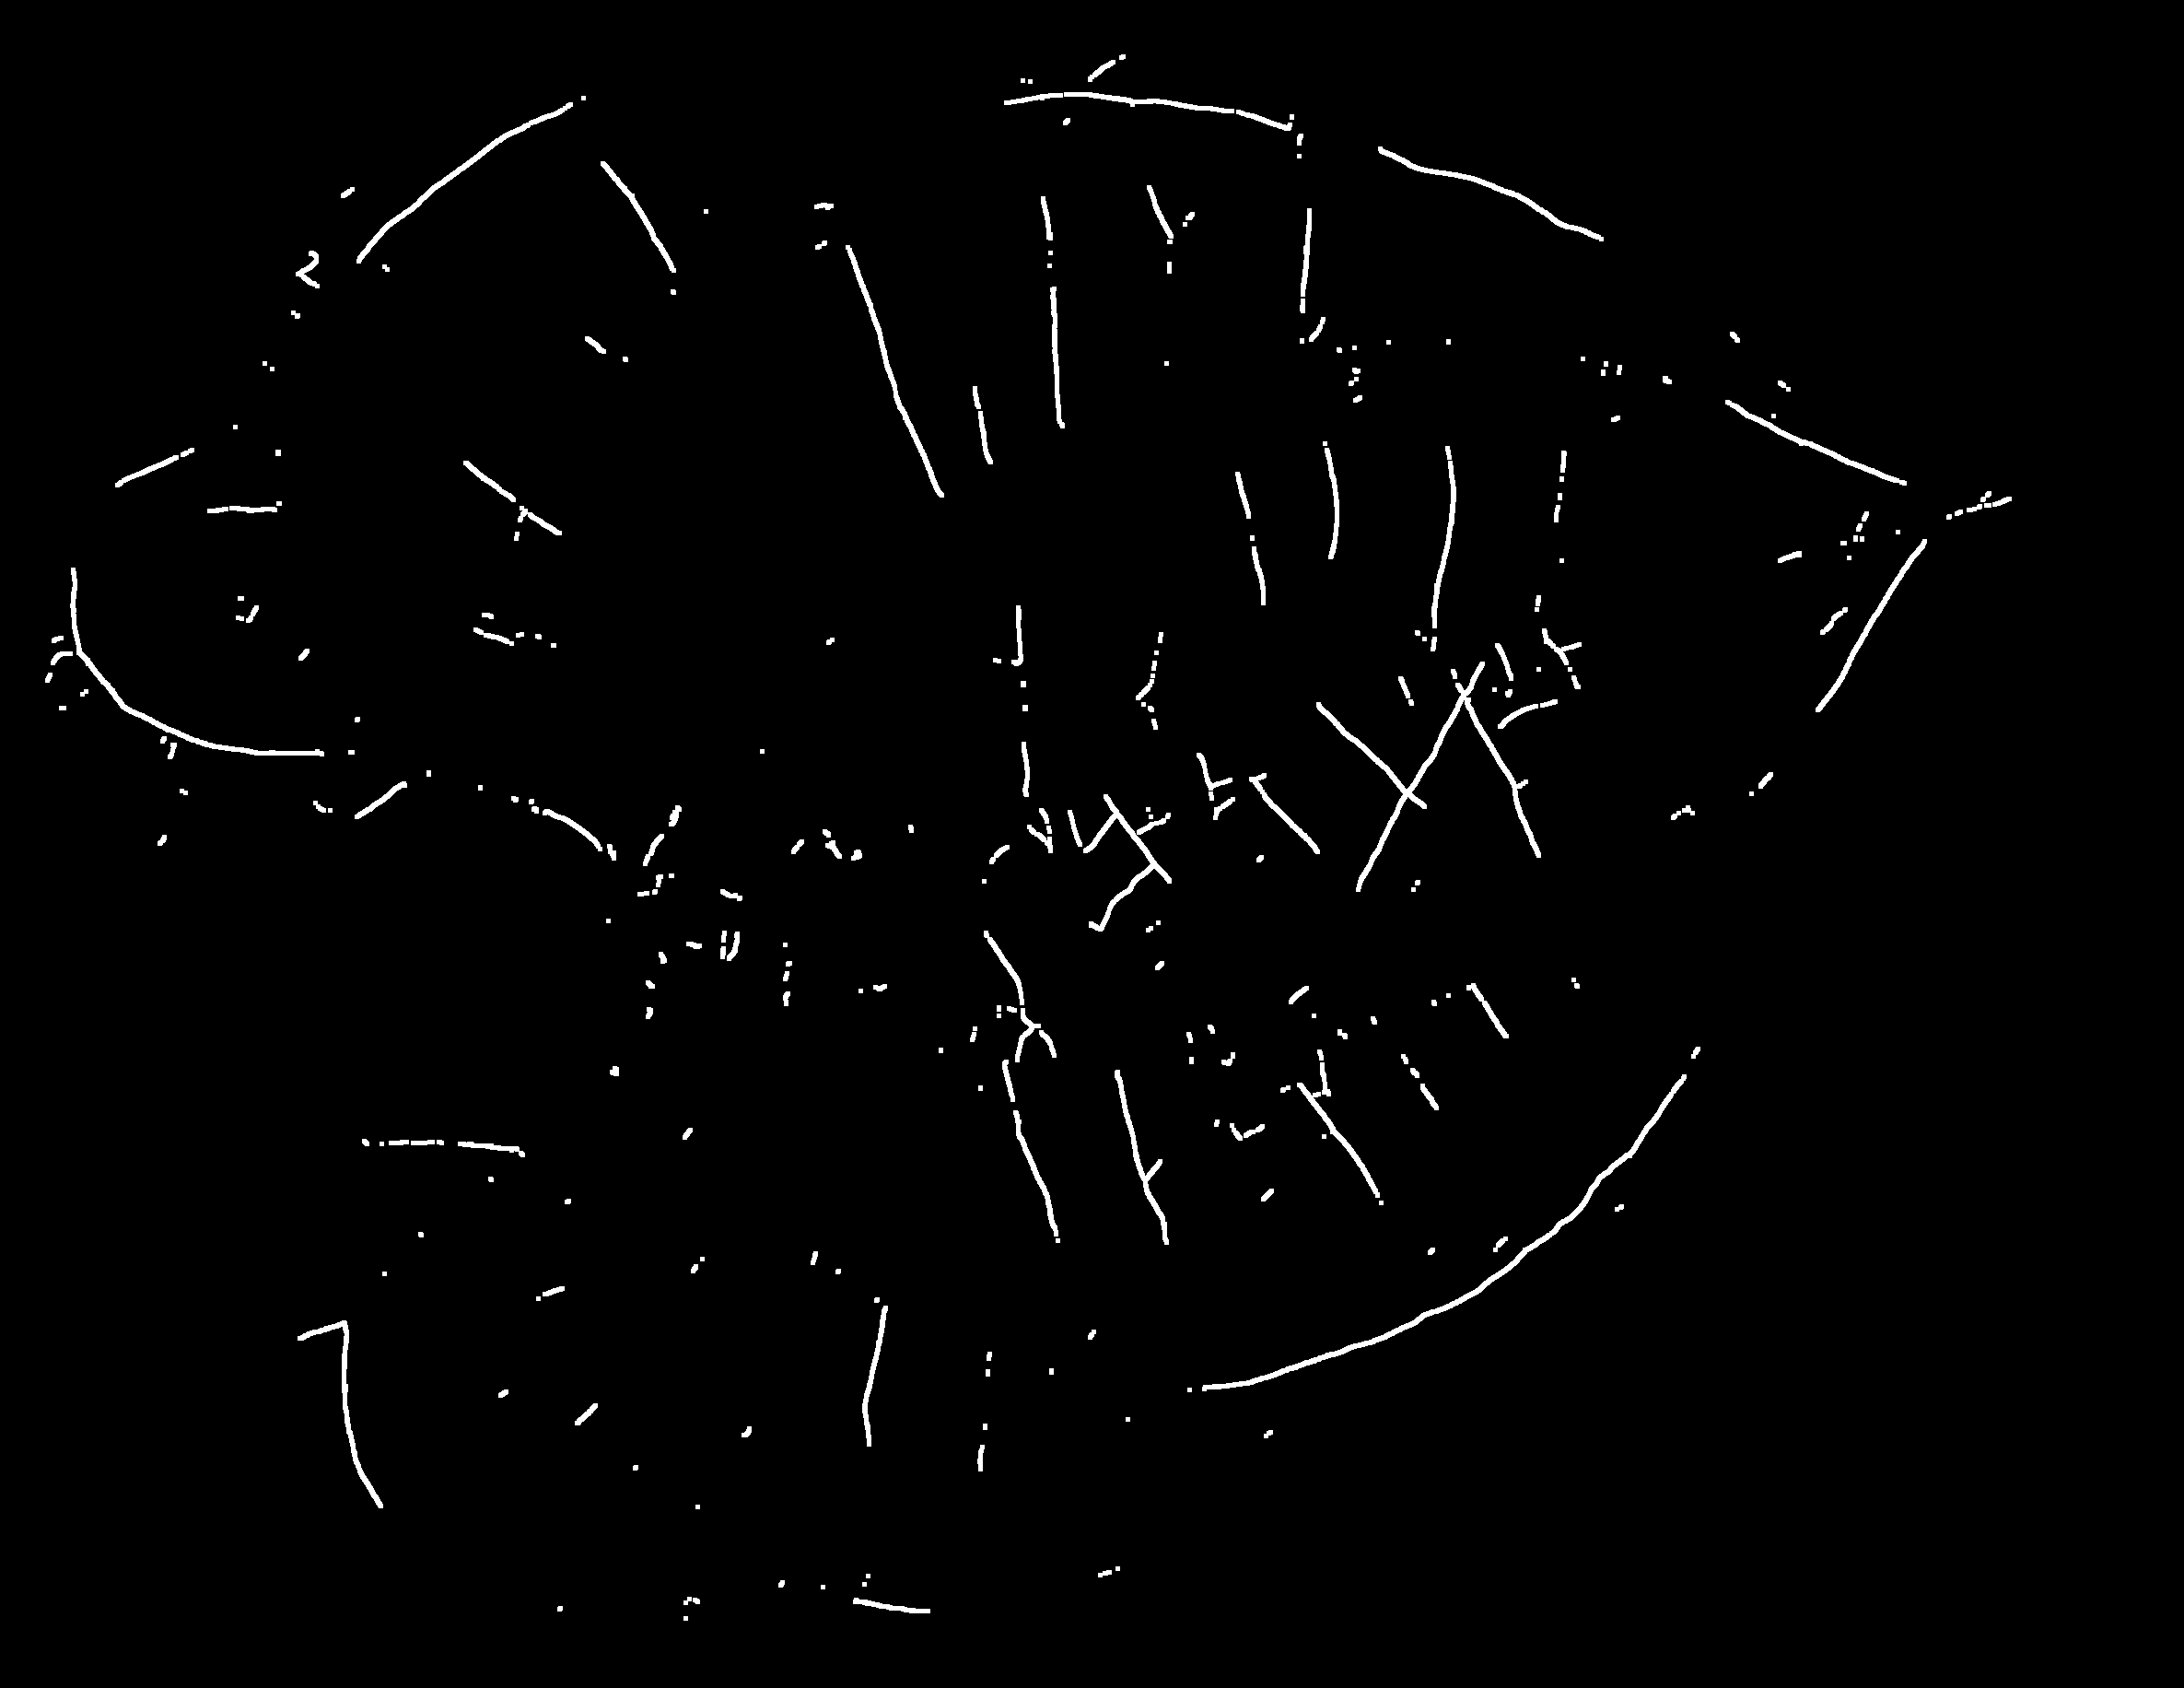

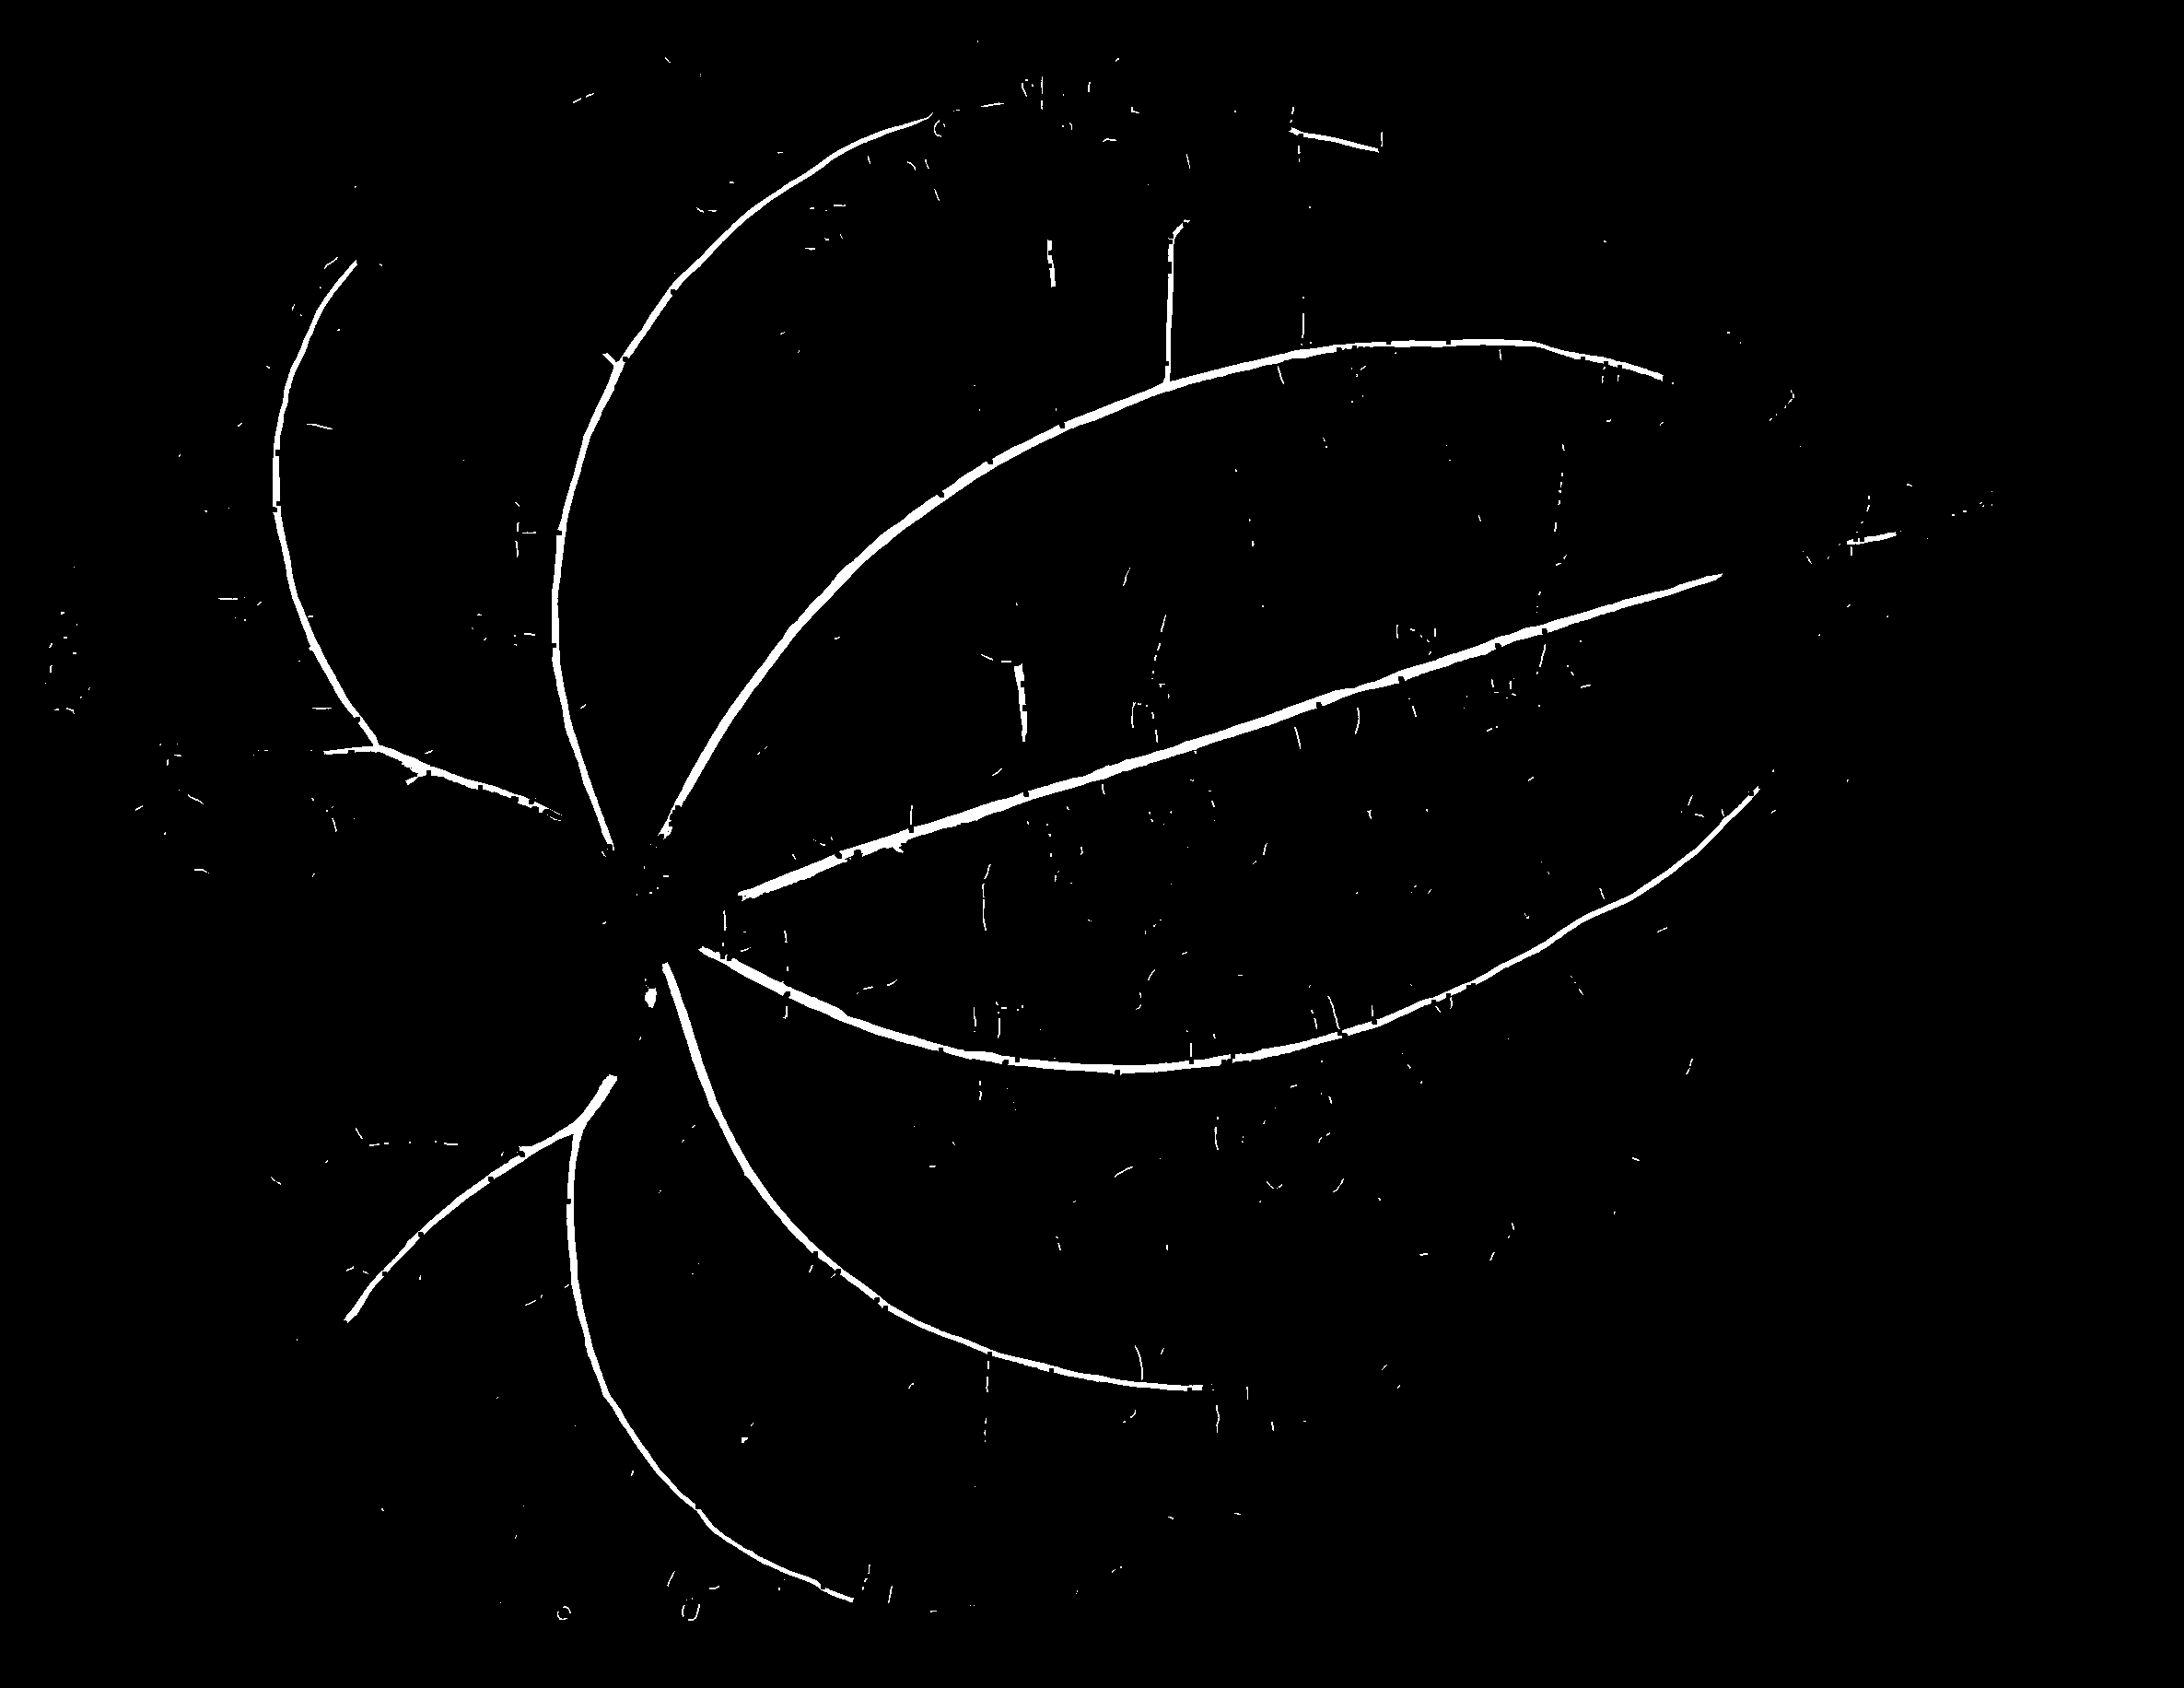

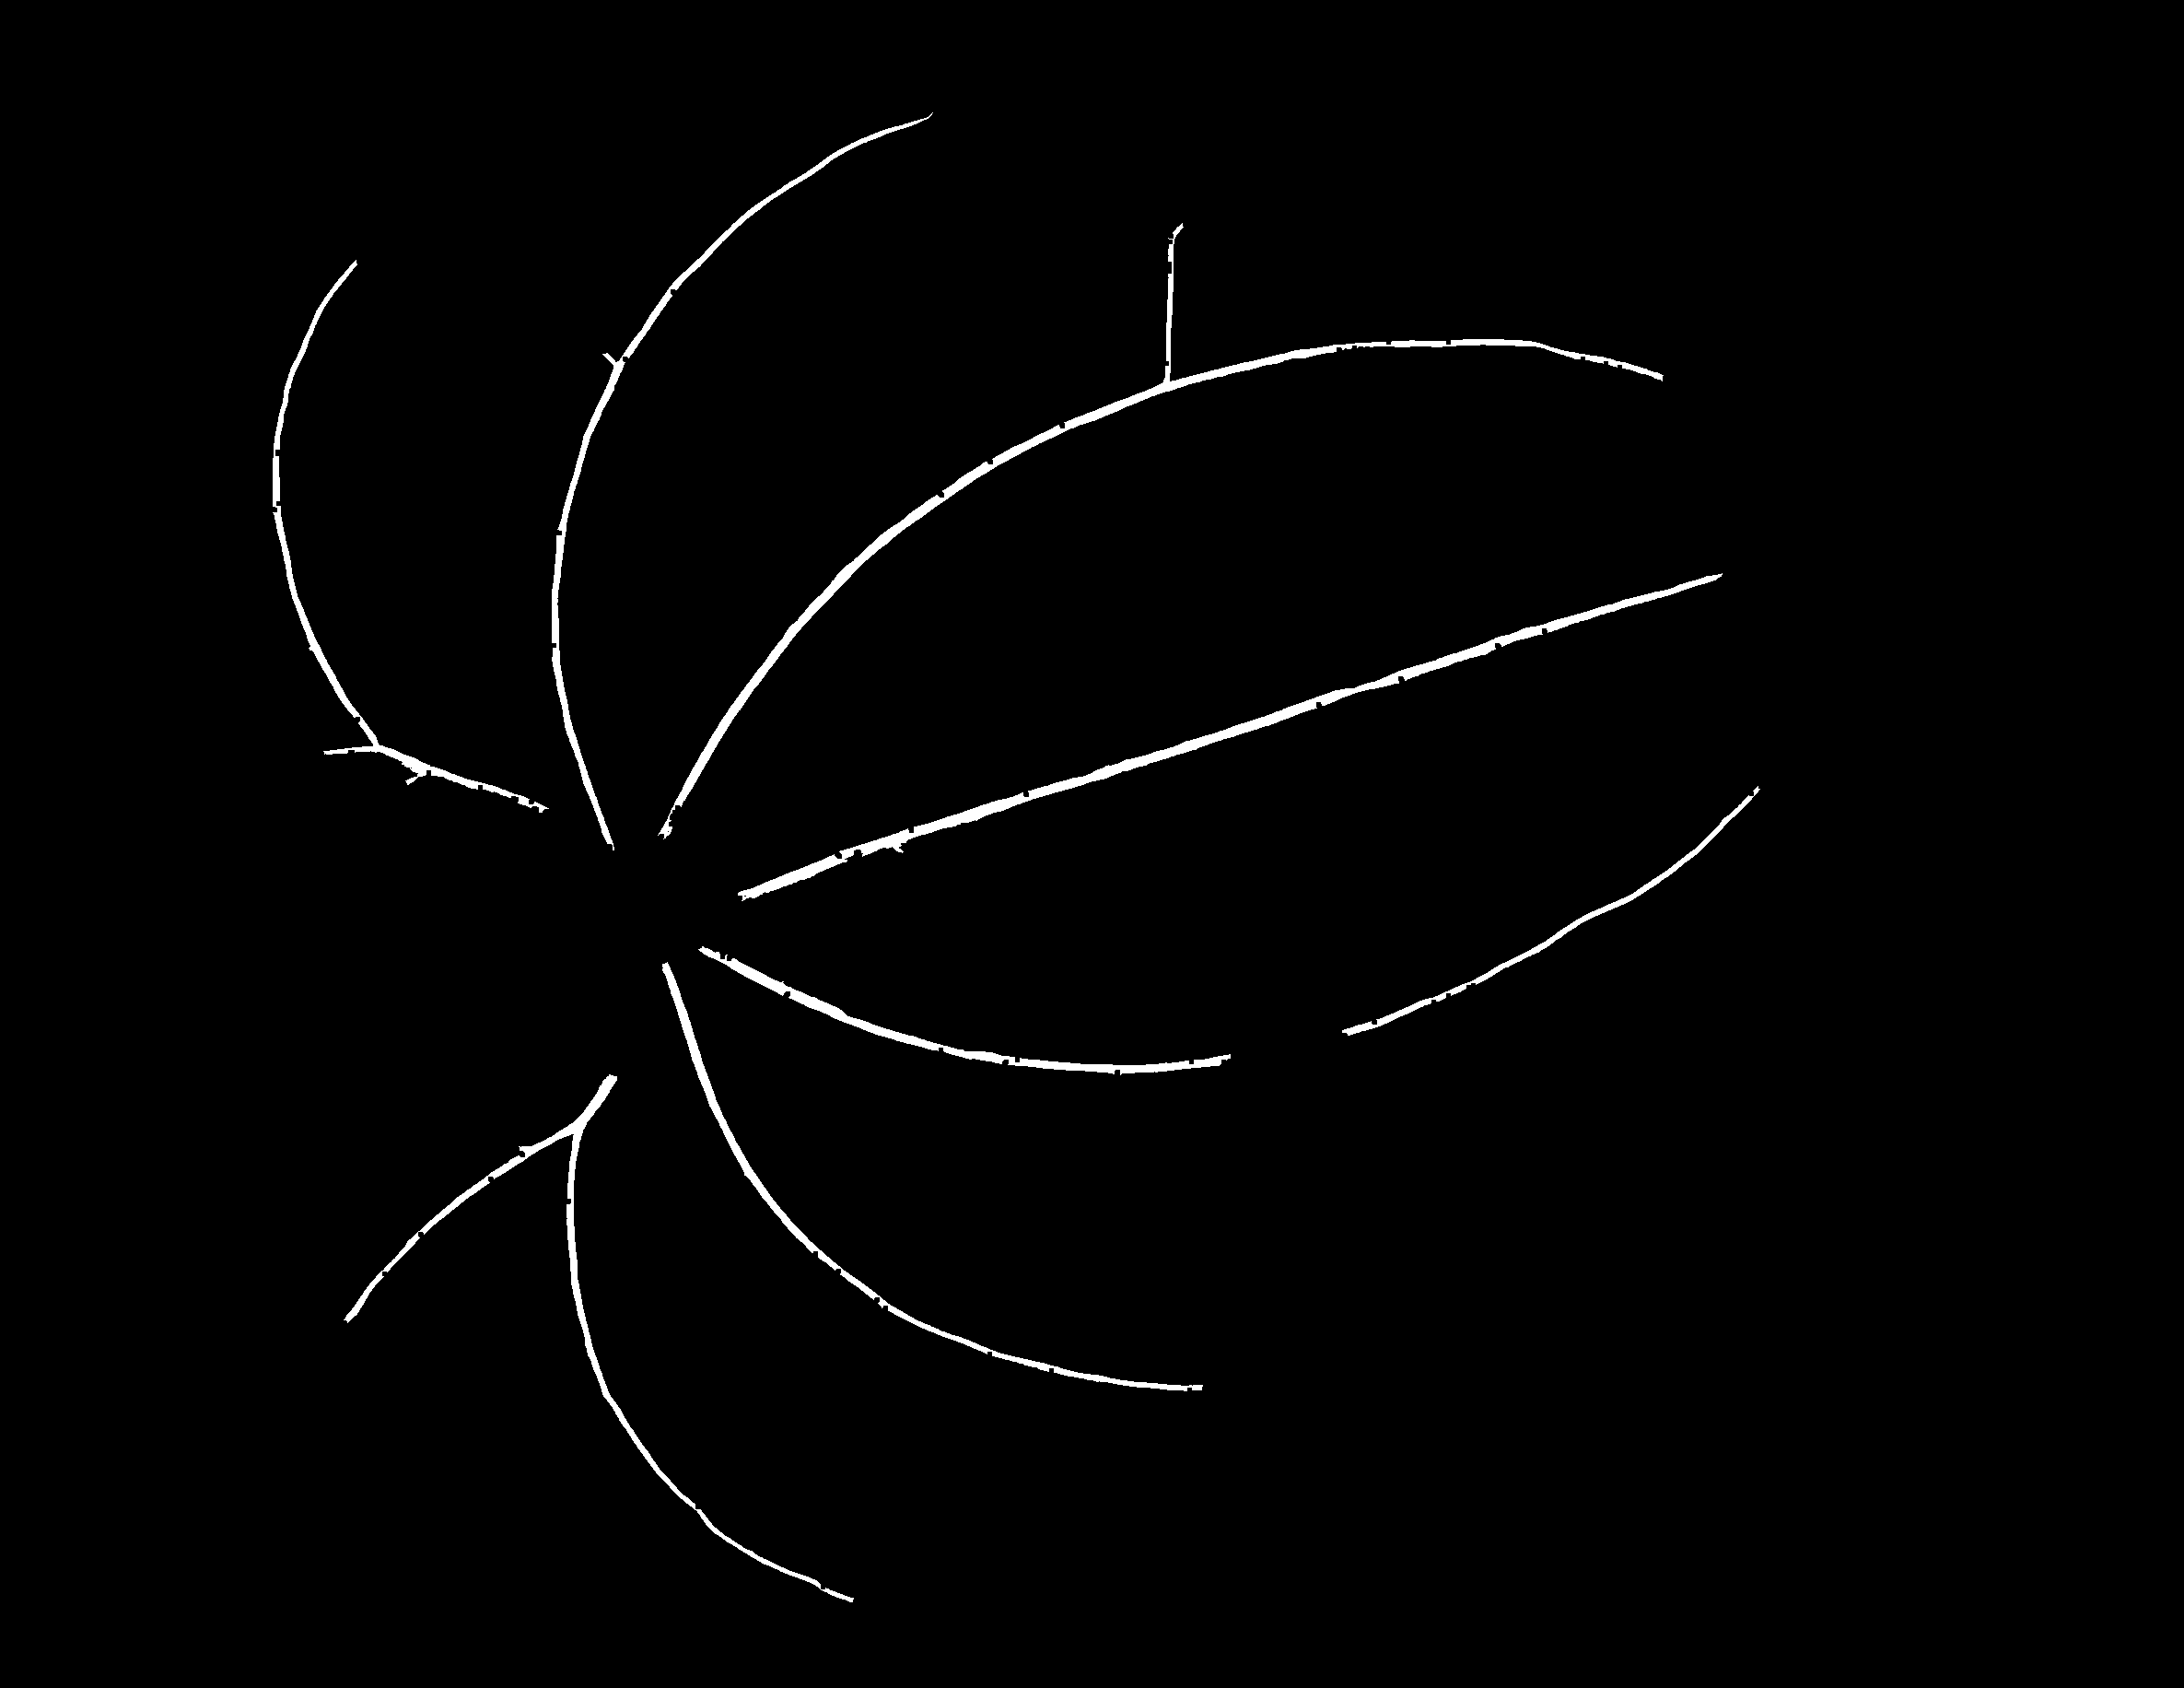

In [ ]:
binary_mask = cv2.imread('/content/drive/MyDrive/few-shot-leaf-segmentation/data/vein_fl_preds/00179829_leaf_1_bot.png', cv2.IMREAD_GRAYSCALE)

#m = 2
#mask1 = filter_thin_structures(binary_mask, kernel_size = m)
#mask2 = filter_small_structures(mask1)

sk_negative = skeleton_pruning(binary_mask)
mask2 = dilate_and_subtract(binary_mask, sk_negative)
mask3 = filter_small_structures(mask2)

In [ ]:
sk = image_pruning

In [ ]:
help(cv2_imshow)

Help on function cv2_imshow in module google.colab.patches:

cv2_imshow(a)
    A replacement for cv2.imshow() for use in Jupyter notebooks.
    
    Args:
      a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. For
        example, a shape of (N, M, 3) is an NxM BGR color image, and a shape of
        (N, M, 4) is an NxM BGRA color image.



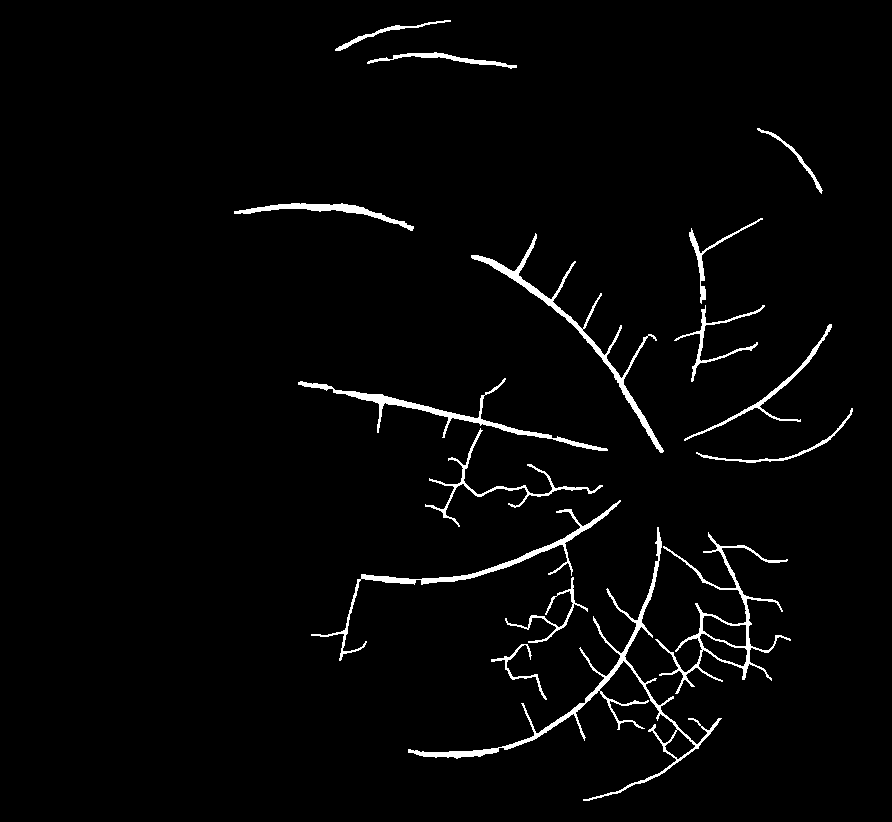

In [ ]:
final_mask = filter_small_structures(mask3)

In [ ]:
def find_smallest_neighborhood(binary_mask, skeleton):
    #dilate
    kernel = np.ones((4,4),np.uint8)
    dilated_mask = cv2.dilate(binary_mask, kernel, iterations = 1)

    #subtract
    contour = cv2.subtract(dilated_mask, binary_mask)

    # Create an empty result mask with the same shape as the skeleton
    result_mask = np.zeros_like(skeleton)*255
    print(np.unique(result_mask))
    # Define the list of neighborhood sizes to check
    neighborhood_sizes = [2, 3, 4, 5, 6, 7, 8 ,9 ,10]
    # Iterate over each pixel in the skeleton
    for y in range(skeleton.shape[0]):
        for x in range(skeleton.shape[1]):
            if skeleton[y, x] != 0:
                smallest_size = None

                # Iterate over different neighborhood sizes
                for size in neighborhood_sizes:
                    half_size = size // 2
                    neighborhood = contour[y - half_size:y + half_size + 1, x - half_size:x + half_size + 1]

                    # Check if the neighborhood intersects with the contour
                    if np.sum(neighborhood) > 0:
                        smallest_size = size
                        break

                # If no intersecting neighborhood found, assign size 8
                if smallest_size is None:
                    smallest_size = 11

                # Assign the smallest size to the corresponding pixel in the result mask
                result_mask[y, x] = smallest_size

    print(np.unique(result_mask))
    return result_mask

[0]
[0 2 4 6 8]


In [ ]:
from skimage.morphology import medial_axis, skeletonize

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(binary_mask, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

In [ ]:
sk2 = skan.csr.Skeleton(dist_on_skel, value_is_height = True)
branch_data = skan.summarize(sk2)

In [ ]:
branch_data

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,0,1,1.000000,0,1.000000,0.000000,9,532,9,533,9,532,9,533,1.000000
1,1,2,3,1.000000,0,1.000000,0.000000,10,529,10,530,10,529,10,530,1.000000
2,2,4,15,11.604106,0,1.248528,0.202922,10,543,16,552,10,543,16,552,10.816654
3,3,11,13,1.414214,0,1.000000,0.000000,14,528,15,529,14,528,15,529,1.414214
4,4,52,73,17.753469,2,1.471405,0.410246,19,518,20,504,19,518,20,504,14.035669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,216,13167,13193,2.732051,1,1.333333,0.471405,780,505,782,504,780,505,782,504,2.236068
1120,297,13224,13225,1.000000,0,1.000000,0.000000,786,569,786,570,786,569,786,570,1.000000
1121,298,13248,13286,18.846746,0,1.025888,0.100265,792,644,799,631,792,644,799,631,14.764823
1122,300,13312,13313,44.429765,0,1.166421,0.338321,803,540,804,501,803,540,804,501,39.012818


array([[<Axes: title={'center': 'mean-pixel-value'}>]], dtype=object)

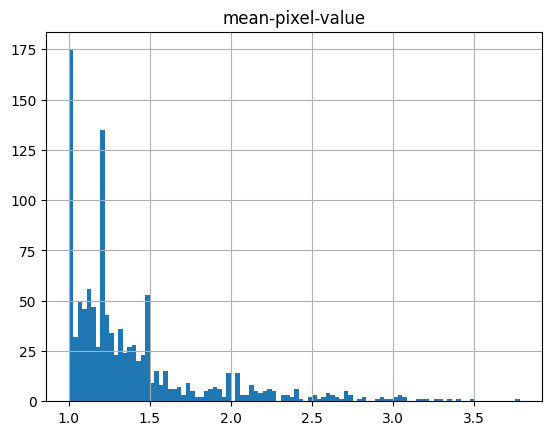

In [ ]:
branch_data.hist(column='mean-pixel-value', bins=100)

In [ ]:
help(skan.csr.Skeleton)


Help on class Skeleton in module skan.csr:

class Skeleton(builtins.object)
 |  Skeleton(skeleton_image, *, spacing=1, source_image=None, keep_images=True, value_is_height=False)
 |  
 |  Object to group together all the properties of a skeleton.
 |  
 |  In the text below, we use the following notation:
 |  
 |  - N: the number of points in the pixel skeleton,
 |  - ndim: the dimensionality of the skeleton
 |  - P: the number of paths in the skeleton (also the number of links in the
 |    junction graph).
 |  - J: the number of junction nodes
 |  - Sd: the sum of the degrees of all the junction nodes
 |  - [Nt], [Np], Nr, Nc: the dimensions of the source image
 |  
 |  Parameters
 |  ----------
 |  skeleton_image : array
 |      The input skeleton (1-pixel/voxel thick skeleton, all other values 0).
 |  
 |  Other Parameters
 |  ----------------
 |  spacing : float or array of float, shape ``(ndim,)``
 |      The scale of the pixel spacing along each axis.
 |  source_image : array of f

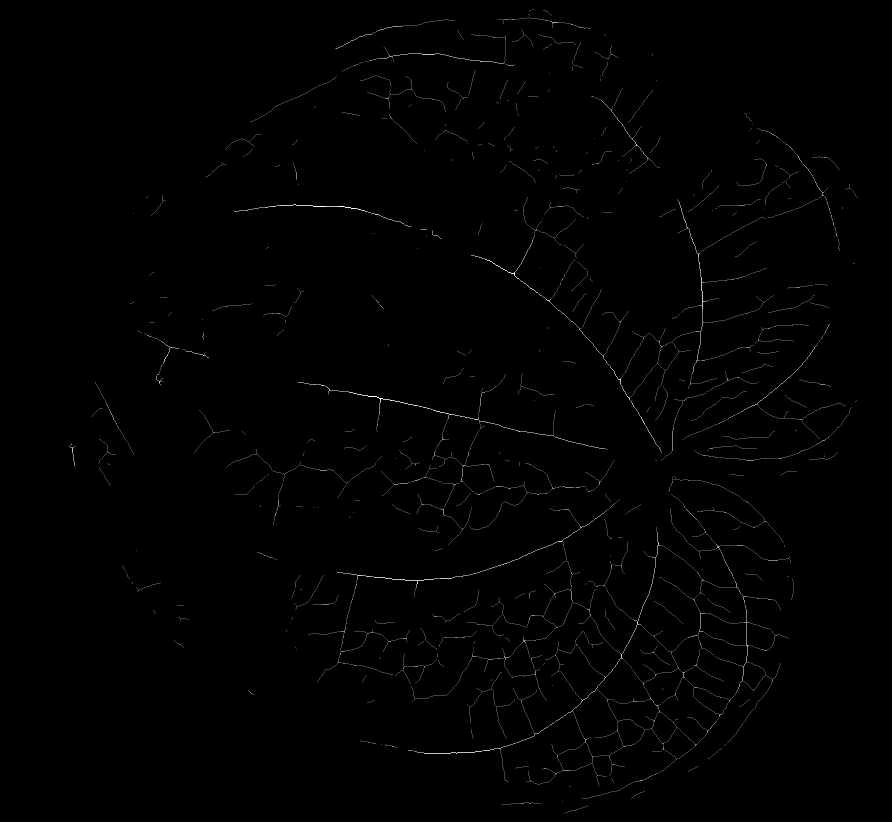

In [ ]:
cv2_imshow(thickness*255/8)

In [ ]:
skan

<module 'skan' from '/usr/local/lib/python3.10/dist-packages/skan/__init__.py'>

In [ ]:
skan.summarize(skan.skeletonize(thickness, value_is_height = True), value_is_height = True)

AttributeError: ignored

In [ ]:
help(skan)

AttributeError: ignored

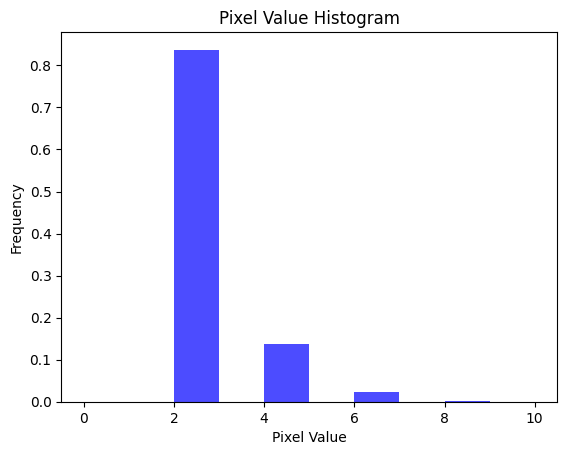

In [ ]:
import matplotlib.pyplot as plt
pixel_values = thickness[thickness>0]

# Create a histogram
plt.hist(pixel_values, bins=10, range=(0, 10), density=True, color='blue', alpha=0.7)

# Set labels and title
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')

# Show the histogram
plt.show()

In [ ]:
from skimage.util.compare import img_as_float
from PIL import Image
import os
def find_darkest_non_black_color(img):
    # Initialize with a value higher than the highest possible pixel value
    colors = list(np.unique(img))
    if len(colors)>1:
      colors.remove(0)
      return min(colors)
    else:
      return 0

def process_image(input_path, output_path):
    # Load the image
    img = cv2.imread(input_path)

    # Check if the image is not empty
    if len(np.unique(img)>2):

        # Set a threshold value (adjust this based on your specific case)
        threshold_value = min(x for x in np.unique(img) if x != 0)

        # Apply binary thresholding
        ret, img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

        # Check if the mask is not empty
        if len(np.unique(img)>2):
            # Save the binary mask with a modified name
            base_name = os.path.basename(input_path)
            output_name = base_name.replace("gtFine_instanceIds", "bot")
            output_path = os.path.join(output_directory, output_name)
            cv2.imwrite(output_path, img)
            print(f'Saved {output_name}')
        else:
            print(f'Skipping {input_path} as it resulted in an empty mask')
    else:
        print(f'Skipping {input_path} as it is an empty image')

# Define source and output directories
source_directory = '/content/drive/MyDrive/job_386615-2023_11_09_08_29_34-cityscapes 1.0/gtFine/default'
output_directory = '/content/drive/MyDrive/Primary Nervation anns'

# Iterate through PNGs in source_directory
for filename in os.listdir(source_directory):
    if filename.endswith('gtFine_instanceIds.png'):
        input_path = os.path.join(source_directory, filename)
        process_image(input_path, output_directory)


Saved 00248056_leaf_0_bot.png
Saved 00248059_leaf_0_bot.png
Saved 00248047_leaf_0_bot.png
Saved 00248044_leaf_0_bot.png
Saved 00179839_leaf_0_bot.png
Saved 00179837_leaf_0_bot.png
Saved 00179829_leaf_1_bot.png
Saved 00179829_leaf_0_bot.png
Saved 00073359_leaf_0_bot.png
Saved 00248140_leaf_0_bot.png
Saved 00248143_leaf_0_bot.png
Saved 00248134_leaf_0_bot.png
Saved 00248131_leaf_1_bot.png
Saved 00248131_leaf_0_bot.png
Saved 00248125-01_leaf_0_bot.png
Saved 00248122_leaf_0_bot.png
Saved 00248111_leaf_0_bot.png
Saved 00248096_leaf_0_bot.png
Saved 00248104_leaf_0_bot.png
Saved 00248085_leaf_1_bot.png
Saved 00248085_leaf_0_bot.png
Saved 00248087_leaf_0_bot.png
Saved 00248082_leaf_0_bot.png
Saved 00248080_leaf_1_bot.png
Saved 00248080_leaf_0_bot.png
Saved 00248078_leaf_0_bot.png
Saved 00248071_leaf_0_bot.png
Saved 00248067_leaf_0_bot.png
Saved 00248076_leaf_0_bot.png
Saved 00248064_leaf_0_bot.png
Saved 00248065_leaf_0_bot.png
Saved 00248065_leaf_1_bot.png
Saved 00248050_leaf_0_bot.png
Saved 0

In [ ]:
import cv2

In [ ]:
import numpy as np
img = cv2.imread('/content/drive/MyDrive/job_386615-2023_11_09_08_29_34-cityscapes 1.0/gtFine/default/00073359_leaf_0_gtFine_instanceIds.png')
np.unique(img)

array([ 0,  3,  7, 11, 15, 19, 39], dtype=uint8)

In [155]:
from PIL import Image

In [153]:
import os
import shutil

preds_directory = '/content/drive/MyDrive/output_masks'
grounds_directory = '/content/drive/MyDrive/Primary Nervation anns'
output_predictions_directory = '/content/drive/MyDrive/predictions_primary_vein'
output_ground_truth_directory = '/content/drive/MyDrive/ground_truth_primary_vein'

# Iterate through files in preds directory
for filename in os.listdir(preds_directory):
    # Check if there is a corresponding file in grounds directory
    if os.path.exists(os.path.join(grounds_directory, filename)):
        # Copy file from preds to predictions_primary_vein
        shutil.copy(os.path.join(preds_directory, filename), output_predictions_directory)
        # Copy file from grounds to ground_truth_primary_vein
        shutil.copy(os.path.join(grounds_directory, filename), output_ground_truth_directory)


In [156]:
def load_binary_mask(directory, filename, threshold=127):
    # Assuming the masks are saved as PNGs
    mask_path = os.path.join(directory, filename)
    mask = np.array(Image.open(mask_path))

    # Convert to single-channel if needed
    if mask.ndim == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    # Apply thresholding
    _, mask = cv2.threshold(mask, threshold, 255, cv2.THRESH_BINARY)

    return mask

predicted_masks_directory = '/content/drive/MyDrive/predictions_primary_vein'
ground_truth_masks_directory = '/content/drive/MyDrive/ground_truth_primary_vein'

predicted_masks = [load_binary_mask(predicted_masks_directory, filename) for filename in os.listdir(predicted_masks_directory)]
ground_truth_masks = [load_binary_mask(ground_truth_masks_directory, filename) for filename in os.listdir(ground_truth_masks_directory)]

In [160]:
import numpy as np

def calculate_iou(predicted_mask, ground_truth_mask):
    intersection = np.logical_and(predicted_mask, ground_truth_mask)
    union = np.logical_or(predicted_mask, ground_truth_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

iou_values = [calculate_iou(predicted_mask, ground_truth_mask) for predicted_mask, ground_truth_mask in zip(predicted_masks, ground_truth_masks)]
average_iou = np.mean(iou_values)
print(average_iou)

0.3459985002281744


In [159]:
def calculate_dice_coefficient(predicted_mask, ground_truth_mask):
    intersection = np.sum(predicted_mask * ground_truth_mask)
    dice_coefficient = 2 * intersection / (np.sum(predicted_mask) + np.sum(ground_truth_mask))
    return dice_coefficient

dice_coefficient_values = [calculate_dice_coefficient(predicted_mask, ground_truth_mask) for predicted_mask, ground_truth_mask in zip(predicted_masks, ground_truth_masks)]
average_dice_coefficient = np.mean(dice_coefficient_values)

print(average_dice_coefficient)
print(max(dice_coefficient_values))

0.0019673903834743884
0.0027071882105772346


In [ ]:
def calculate_pixel_accuracy(predicted_mask, ground_truth_mask):
    correct_pixels = np.sum(predicted_mask == ground_truth_mask)
    total_pixels = predicted_mask.size
    pixel_accuracy = correct_pixels / total_pixels
    return pixel_accuracy

pixel_accuracy_values = [calculate_pixel_accuracy(predicted_mask, ground_truth_mask) for predicted_mask, ground_truth_mask in zip(predicted_masks, ground_truth_masks)]
average_pixel_accuracy = np.mean(pixel_accuracy_values)
print(average_pixel_accuracy)

0.9755340216702163


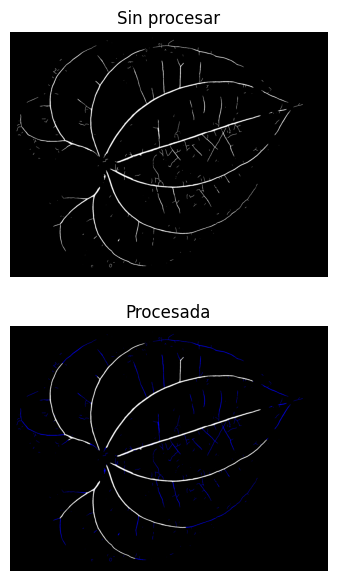

In [151]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two masks
mask1 = cv2.imread('/content/drive/MyDrive/vein_fl_preds (selected)/00179829_leaf_1_bot.png', cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread('/content/drive/MyDrive/predictions_primary_vein/00179829_leaf_1_bot.png', cv2.IMREAD_GRAYSCALE)

# Ensure the masks have the same dimensions
mask2 = cv2.resize(mask2, (mask1.shape[1], mask1.shape[0]))

# Find the absolute difference between the two masks
diff_mask = cv2.absdiff(mask1, mask2)

# Create a color image with the first mask as the base
overlay = cv2.cvtColor(mask1, cv2.COLOR_GRAY2BGR)

# Highlight the differences by setting them to a specific color (e.g., red)
overlay[diff_mask > 0] = [0, 0, 255]  # Red color for differences

# Create a subplot to display the original mask and the overlay
fig, axes = plt.subplots(2, 1, figsize=(15, 7))

# Plot the original mask (mask1)
axes[0].imshow(mask1, cmap='gray')
axes[0].set_title('Sin procesar')
axes[0].axis('off')

# Plot the overlay with differences highlighted
axes[1].imshow(overlay)
axes[1].set_title('Procesada')
axes[1].axis('off')

plt.show()
